In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random
import h5py
import pywt                                                                                                                                                                                  
import scipy

In [86]:
with open('sub_results.pickle', 'rb') as handle:
    samples = pickle.load(handle)
with open('sub_wf_results.pickle', 'rb') as handle:
    wf_results = pickle.load(handle)

In [88]:
def calc_conf(truths, preds, cat_name, idx):
    cat = {'1': {'TP': 0, 'TN':0, 'FP': 0, 'FN':0},
           '5': {'TP': 0, 'TN':0, 'FP': 0, 'FN':0}}
    for i in range(len(truths)):
        truth = np.reshape(truths[i].T,(3,3001))
        pred = np.reshape(preds[i].T,(3,3001))
        truth = truth[idx]
        pred = pred[idx]
        y_idx = np.argmax(truth)
        pred_idx = np.argmax(pred)
        if pred[pred_idx] > .5 and truth[y_idx] > .99:
            if abs(pred_idx - y_idx) < 50:
                cat['5']['TP'] += 1
                if abs(pred_idx - y_idx) < 10:
                    cat['1']['TP'] += 1
                else:
                    cat['1']['FN'] += 1
            else:
                cat['5']['FN'] += 1
                cat['1']['FN'] += 1
        if pred[pred_idx] > .5 and truth[y_idx] < .99:
            cat['5']['FP'] += 1
            cat['1']['FP'] += 1            
        if pred[pred_idx] < .5 and truth[y_idx] < .99:
            cat['5']['TN'] += 1
            cat['1']['TN'] += 1 
    cat_acc_1 = (cat['1']['TP'] + cat['1']['TN']) / (cat['1']['TP'] + cat['1']['TN'] + cat['1']['FP'] + cat['1']['FN'])
    cat_acc_5 = (cat['5']['TP'] + cat['5']['TN']) / (cat['5']['TP'] + cat['5']['TN'] + cat['5']['FP'] + cat['5']['FN'])
    print('.1s accuracy for ', cat_name, np.round(cat_acc_1, 5))
    print('.5s accuracy for ', cat_name, np.round(cat_acc_5, 5))
    return cat
def get_accuracy(y, preds):
    P_res = calc_conf(y, preds, 'P-wave', 0)
    S_res = calc_conf(y, preds, 'S-wave', 1)

print('WAVEFORM:')
get_accuracy(wf_results['truth'], wf_results['preds']) 
print('SCALOGRAM:')
get_accuracy(samples['truth'], samples['preds']) 

WAVEFORM:
.1s accuracy for  P-wave 0.85915
.5s accuracy for  P-wave 0.92153
.1s accuracy for  S-wave 0.74593
.5s accuracy for  S-wave 0.90041
SCALOGRAM:
.1s accuracy for  P-wave 0.85743
.5s accuracy for  P-wave 0.92369
.1s accuracy for  S-wave 0.7378
.5s accuracy for  S-wave 0.90244


In [89]:
diff = 0.0009765625
entry = 1-0.0009765625
levels = []
for i in range(10):
    levels.append(entry)
    entry-=diff
    diff*=2
levels.reverse()
contourlevels = levels
cmap = plt.cm.seismic
time = np.linspace(0,30,3001)
freq = [25., 12.5, 8.3, 6.25, 5., 4.16, 3.57, 3.125, 2.77, 2.5, 2.27, 2.08, 1.92, 1.78, 1.66, 1.56, 1.47, 1.388, 1.315, 1.25, 1.19, 1.136, 1.0869, 1.041, 1., 0.9615, 0.9259, 0.8928, 0.862, 0.8333, 0.80645]
freq = [25., 12.5, 8.33333333]

In [94]:
def plot_data(X, y,preds):
    fig = plt.figure(figsize=(15, 10))
    axs = fig.subplots(3, 1, sharex=True)
    axs[0].plot(X[0], label='Z')
    axs[0].plot(X[1], label='N')
    axs[0].plot(X[2], label='E')
    axs[0].legend()
    axs[1].plot(y[0], label='analyst P')
    axs[1].plot(y[1], label='analyst S')
    axs[1].plot(y[2], label='analyst Noise')
    axs[1].legend()
    axs[2].plot(preds[0], label='model P')
    axs[2].plot(preds[1], label='model S')
    axs[2].plot(preds[2], label='model Noise')
    axs[2].legend()
    plt.tight_layout()
    plt.subplots_adjust(hspace=0)
    plt.show()
def plot_scaleo(X, y, preds, freq):
        
    fig = plt.figure(figsize=(16, 10))

    fig, ax = plt.subplots(nrows=5, sharex=True, figsize=(15,10))

    idx_Z = 0
    idx_N = int(len(X)/3)
    idx_E = int(2*len(X)/3)
    im = ax[0].contourf(time, freq, X[idx_Z:idx_N], contourlevels, extend='both',cmap=cmap)
    im = ax[1].contourf(time, freq, X[idx_N:idx_E], contourlevels, extend='both',cmap=cmap)
    im = ax[2].contourf(time, freq, X[idx_E:], contourlevels, extend='both',cmap=cmap)
   
    ax[3].plot(time, y[0], label='analyst P')
    ax[3].plot(time, y[1], label='anlayst S')
    ax[3].plot(time, y[2], label='analyst Noise')
    ax[3].legend()
        
    #ax[3].plot(time, preds[1], label='model S')
    ax[4].plot(time, preds[0] , label='model P')
    ax[4].plot(time, preds[1], label='model S')
    ax[4].plot(time, preds[2], label='model Noise')

    ax[4].legend()
    

    plt.tight_layout()
    plt.subplots_adjust(hspace=0)
    cb = plt.colorbar(im, ax=ax.ravel().tolist(),fraction=.015, pad = .02)
    cb.set_label(label='normalized power', size=14)
    plt.show();
    

<Figure size 1152x720 with 0 Axes>

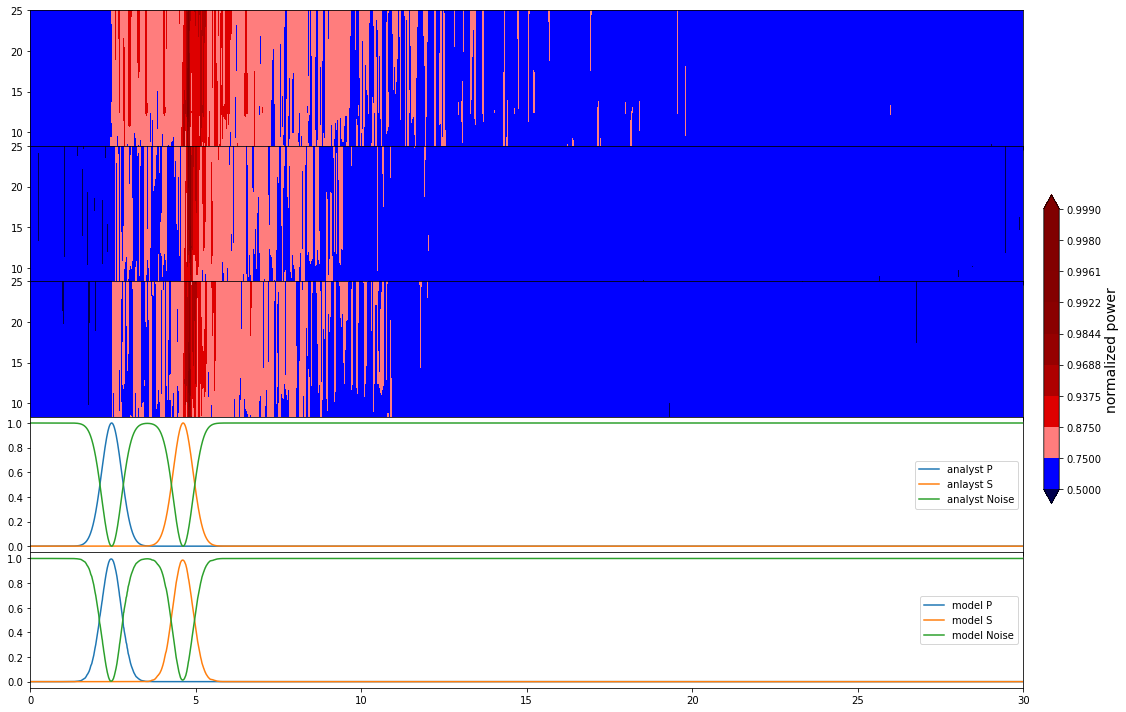

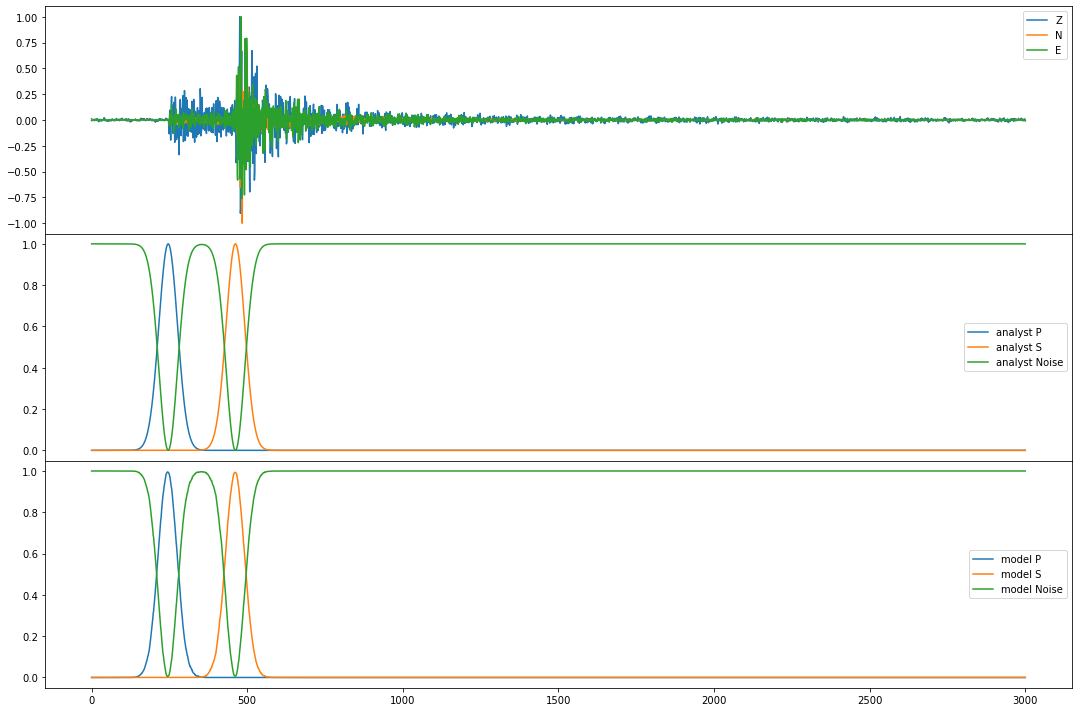

<Figure size 1152x720 with 0 Axes>

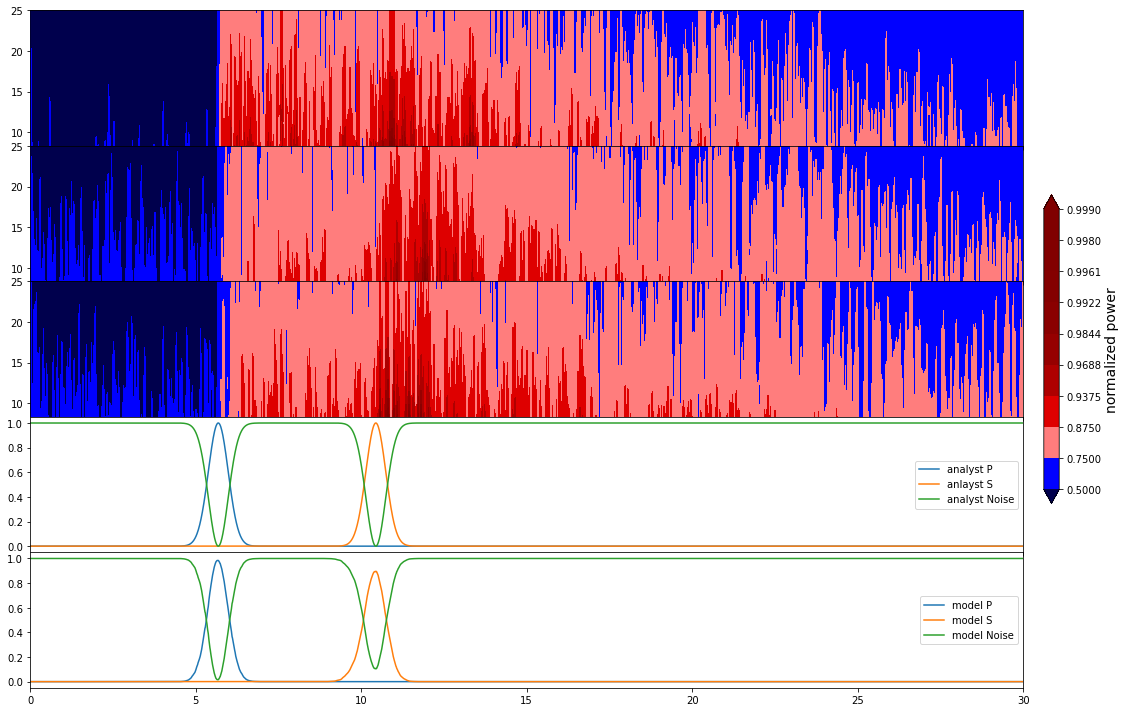

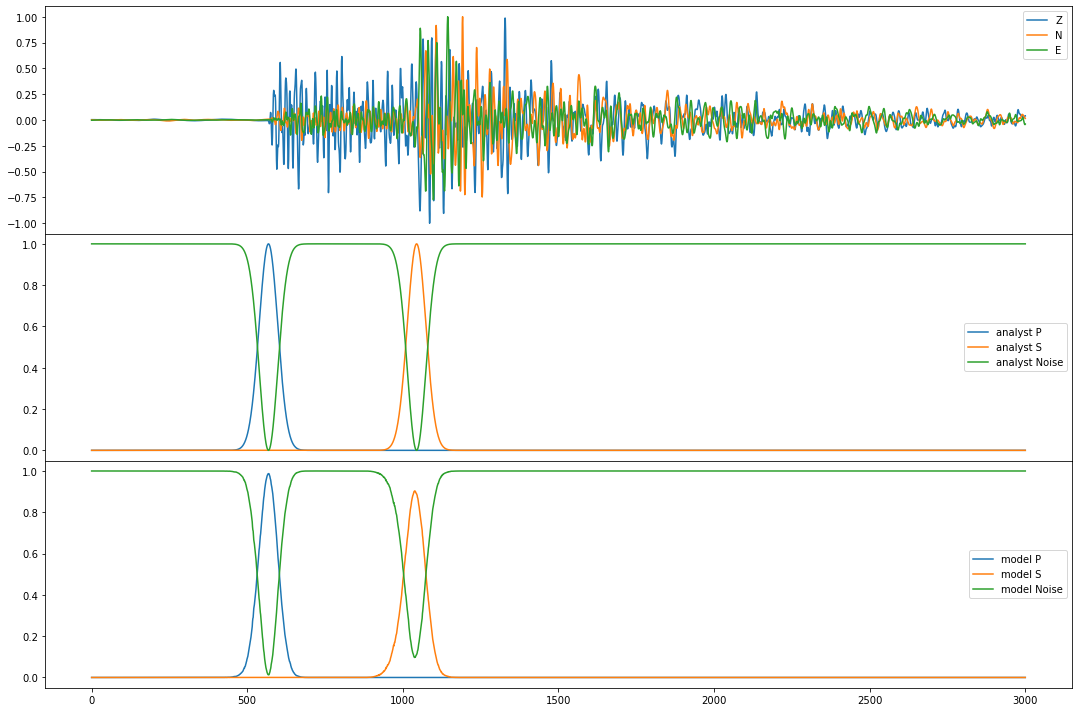

<Figure size 1152x720 with 0 Axes>

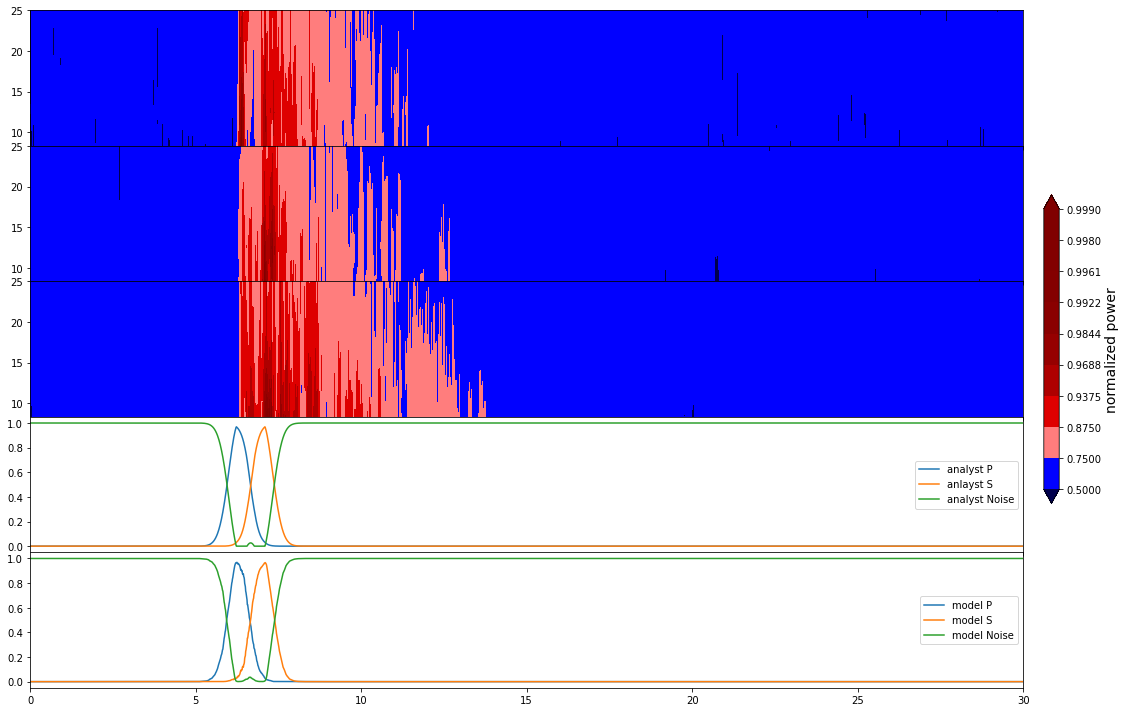

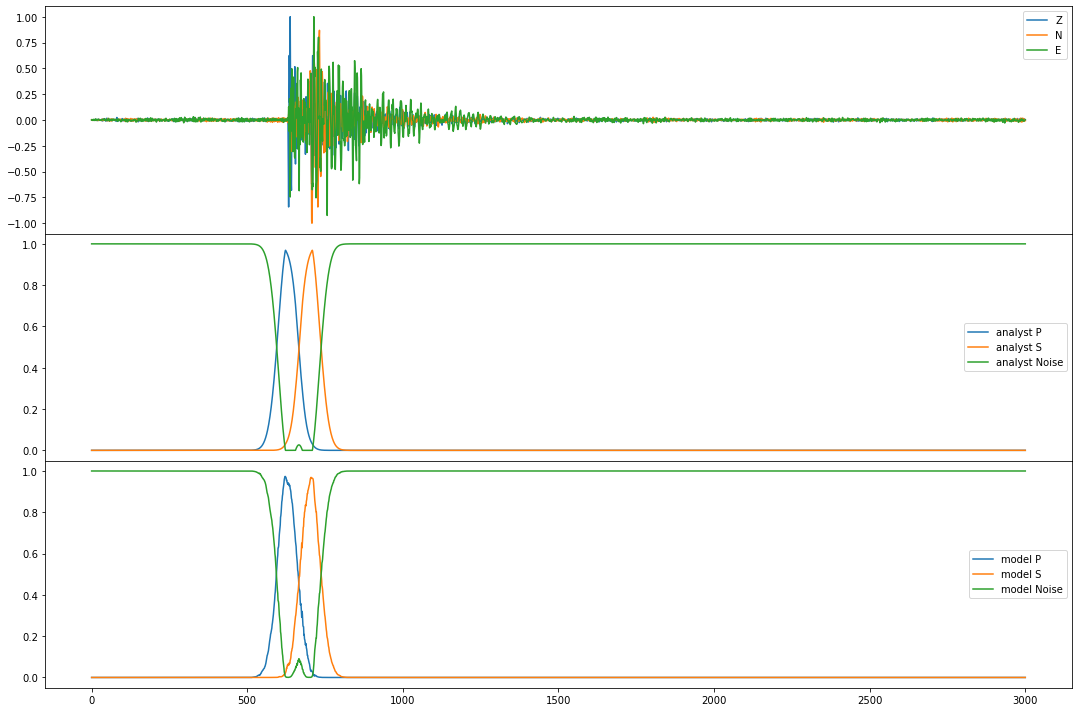

<Figure size 1152x720 with 0 Axes>

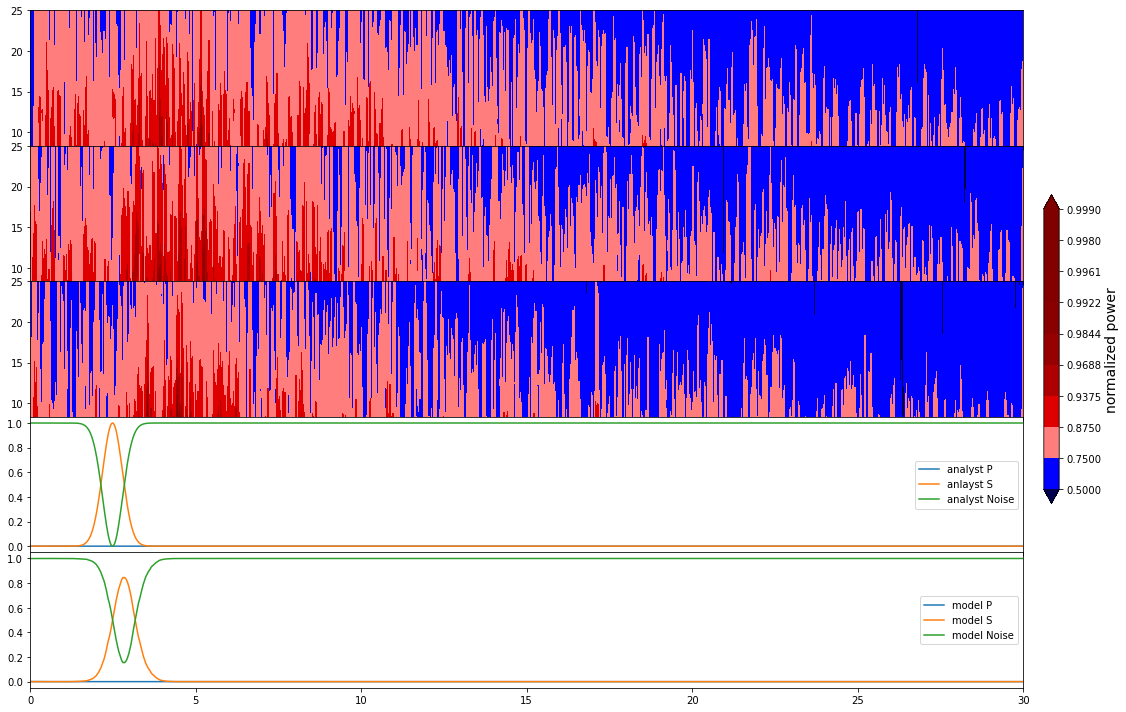

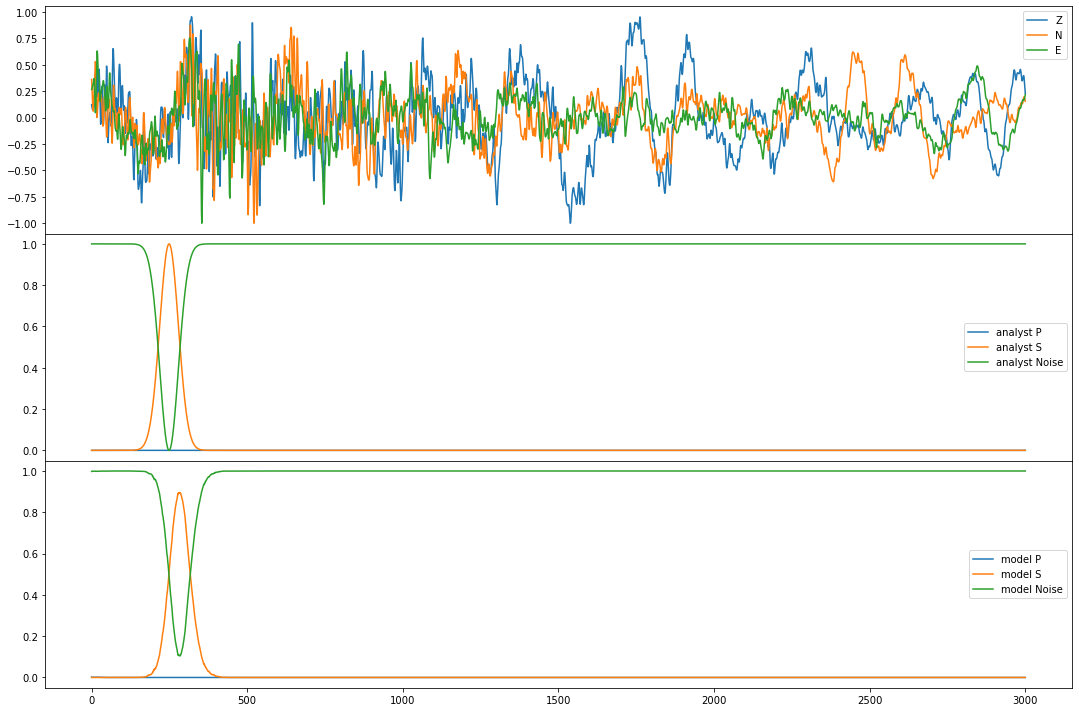

<Figure size 1152x720 with 0 Axes>

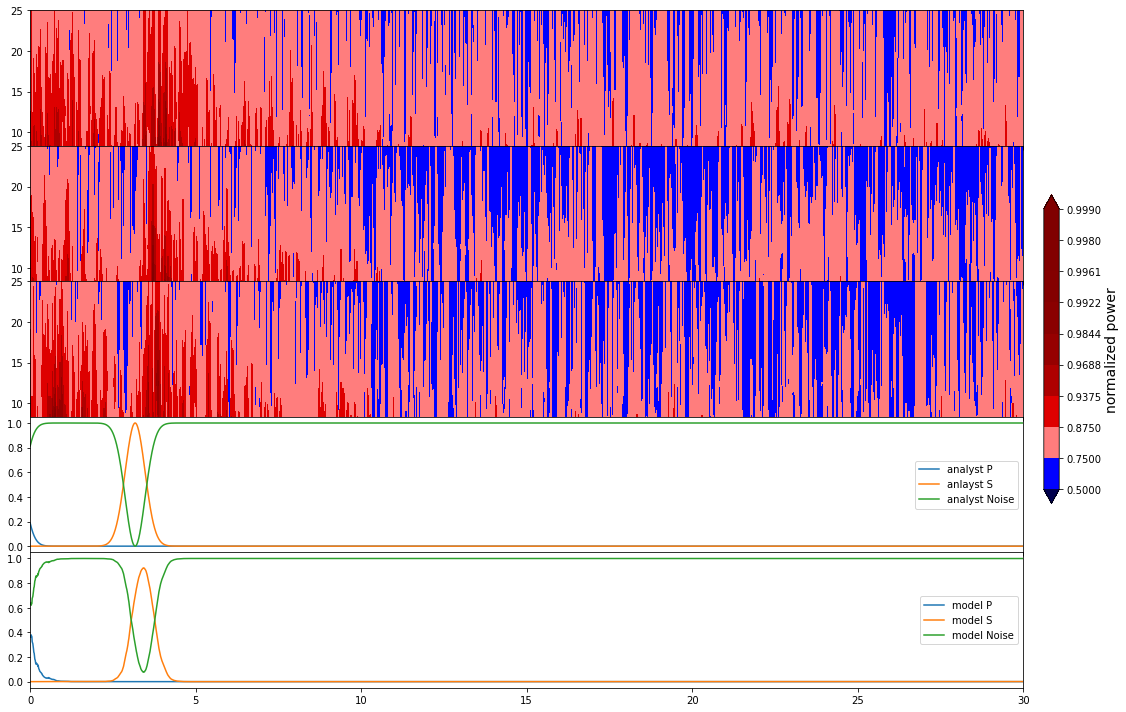

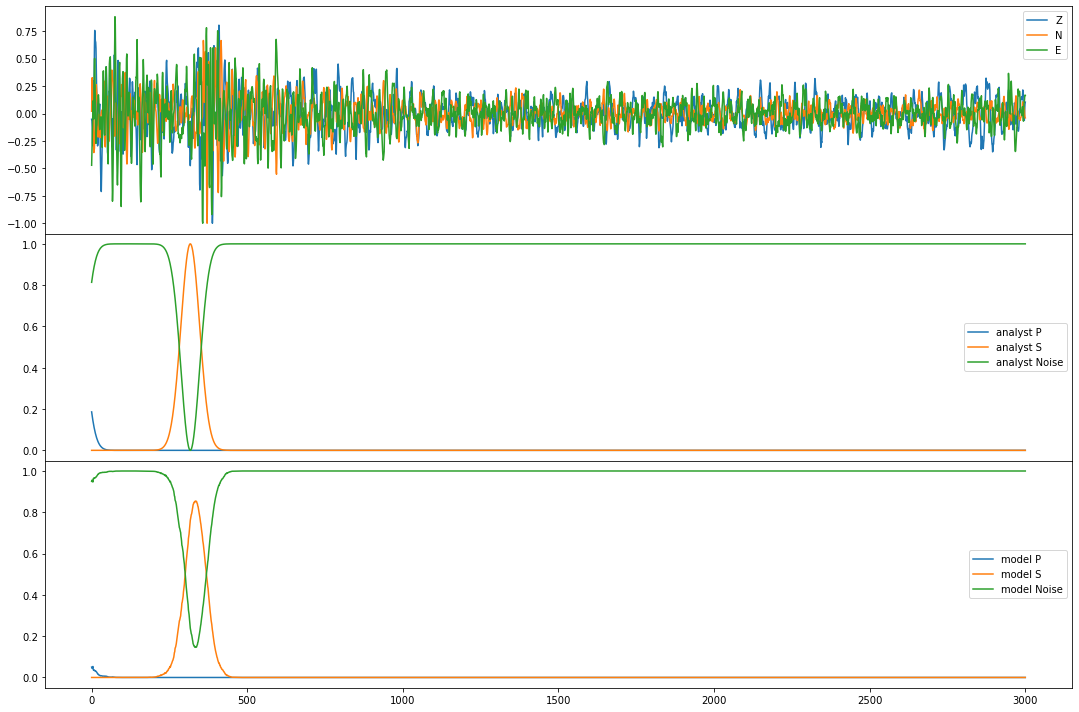

<Figure size 1152x720 with 0 Axes>

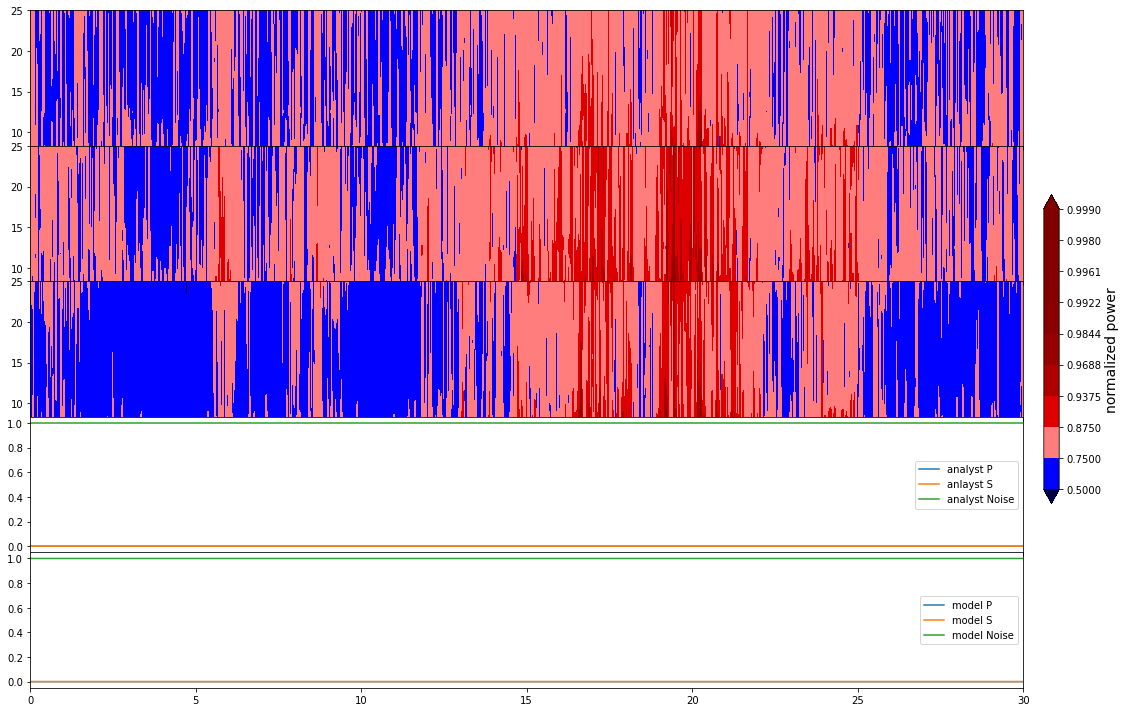

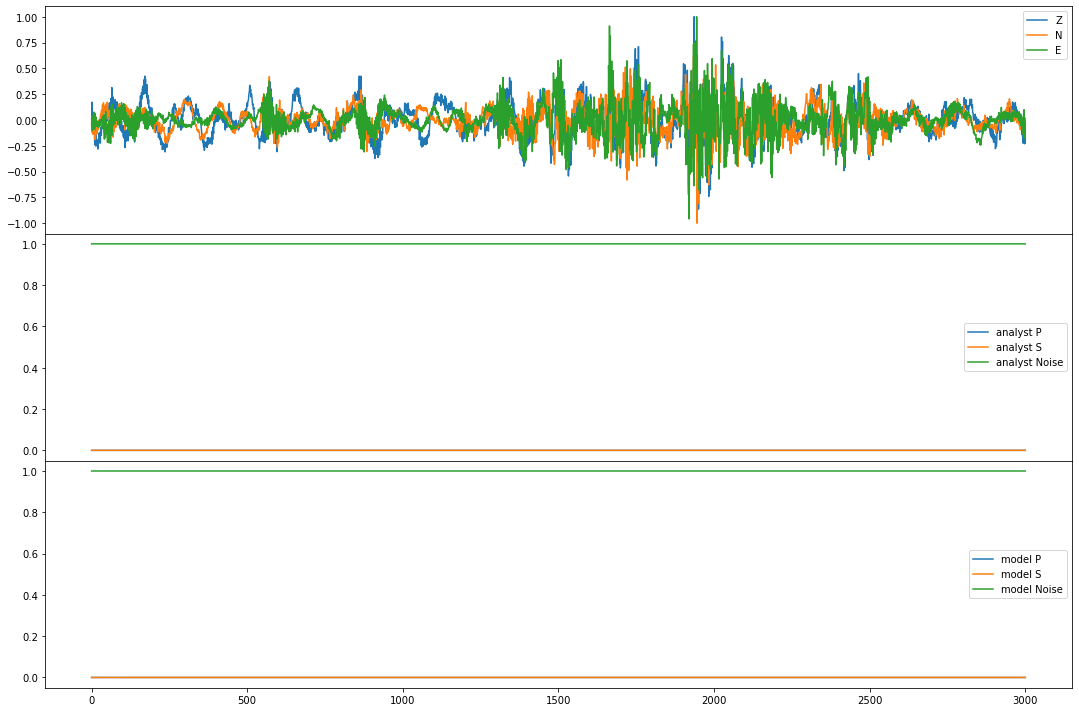

<Figure size 1152x720 with 0 Axes>

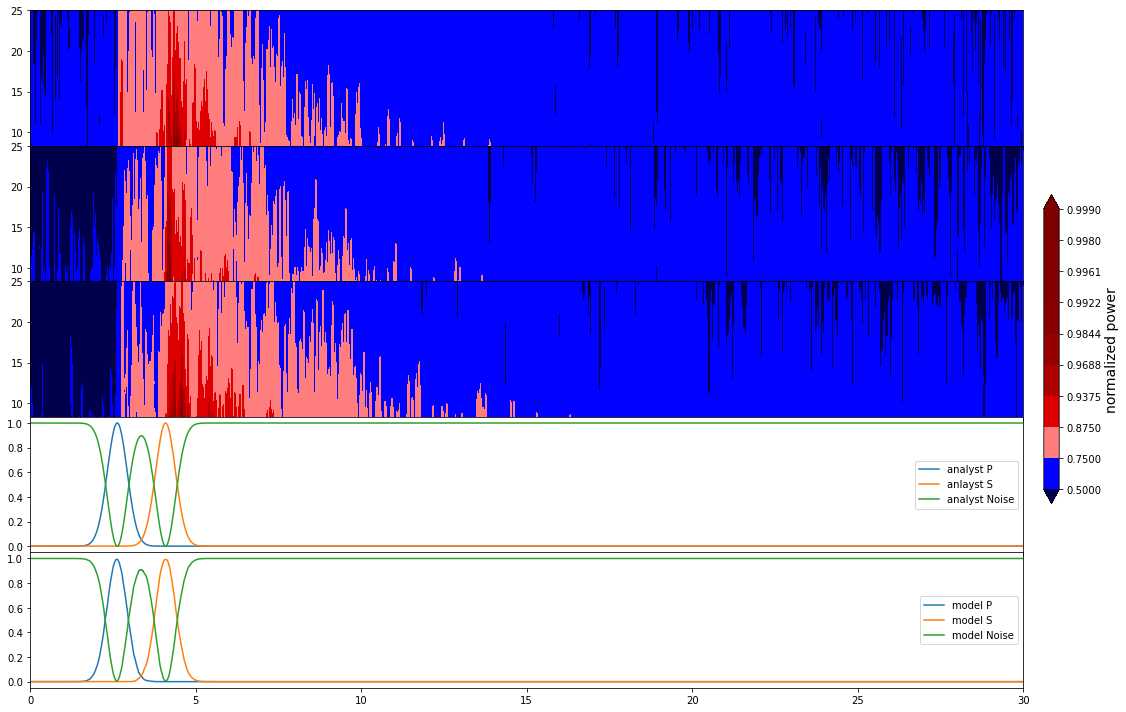

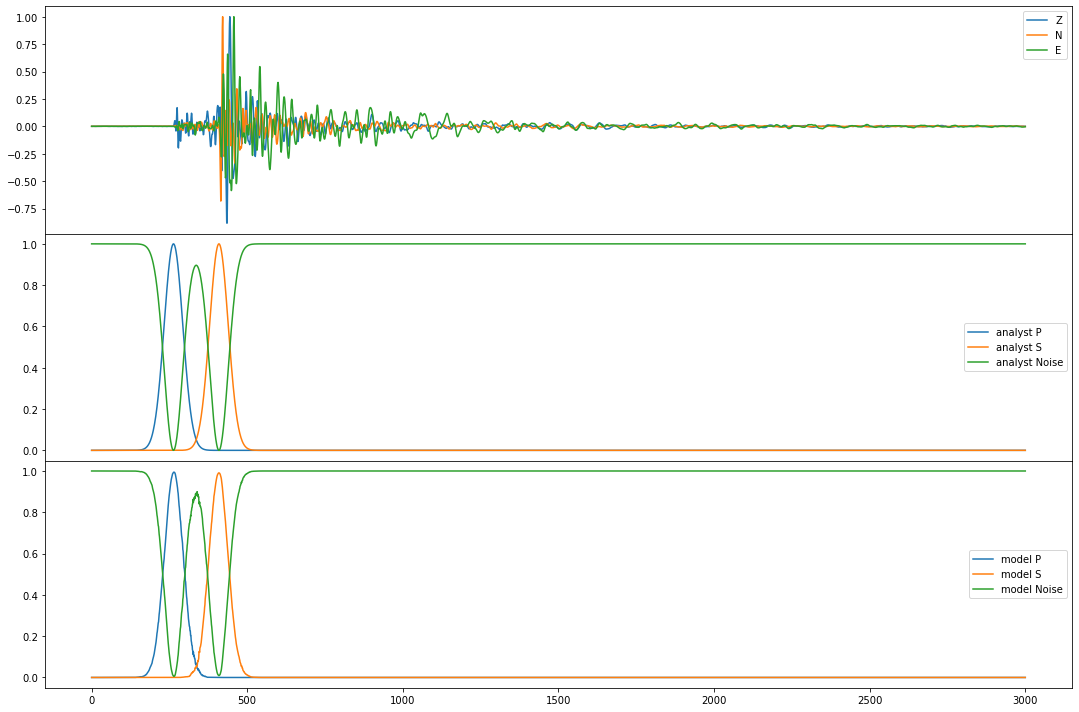

<Figure size 1152x720 with 0 Axes>

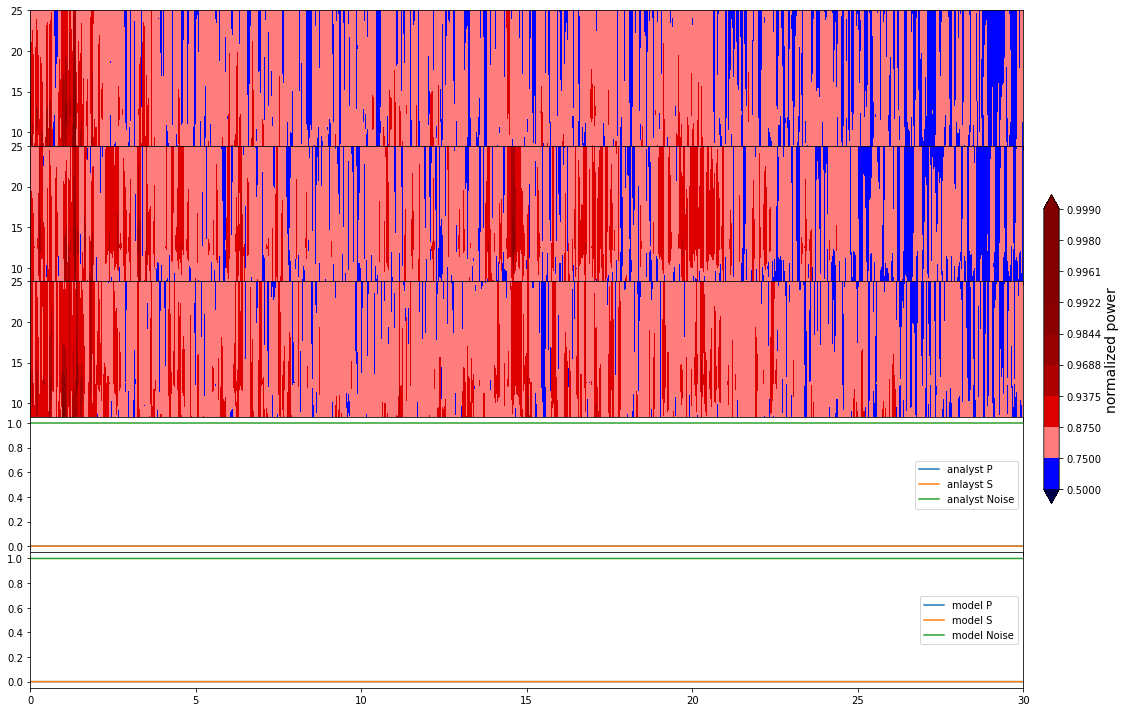

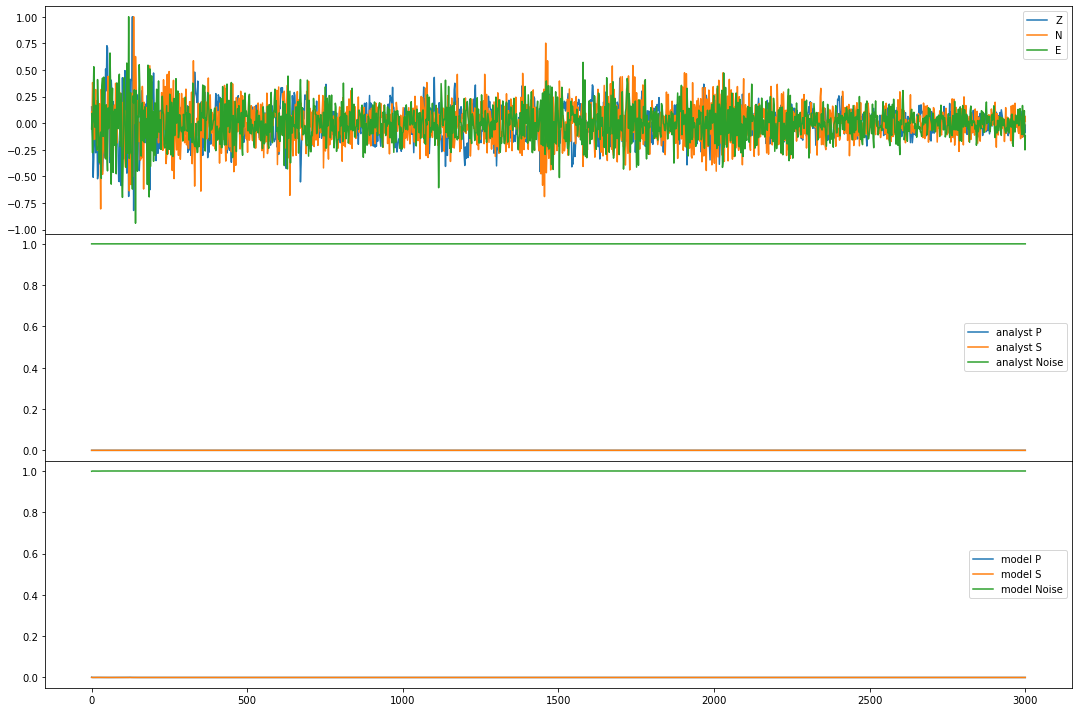

<Figure size 1152x720 with 0 Axes>

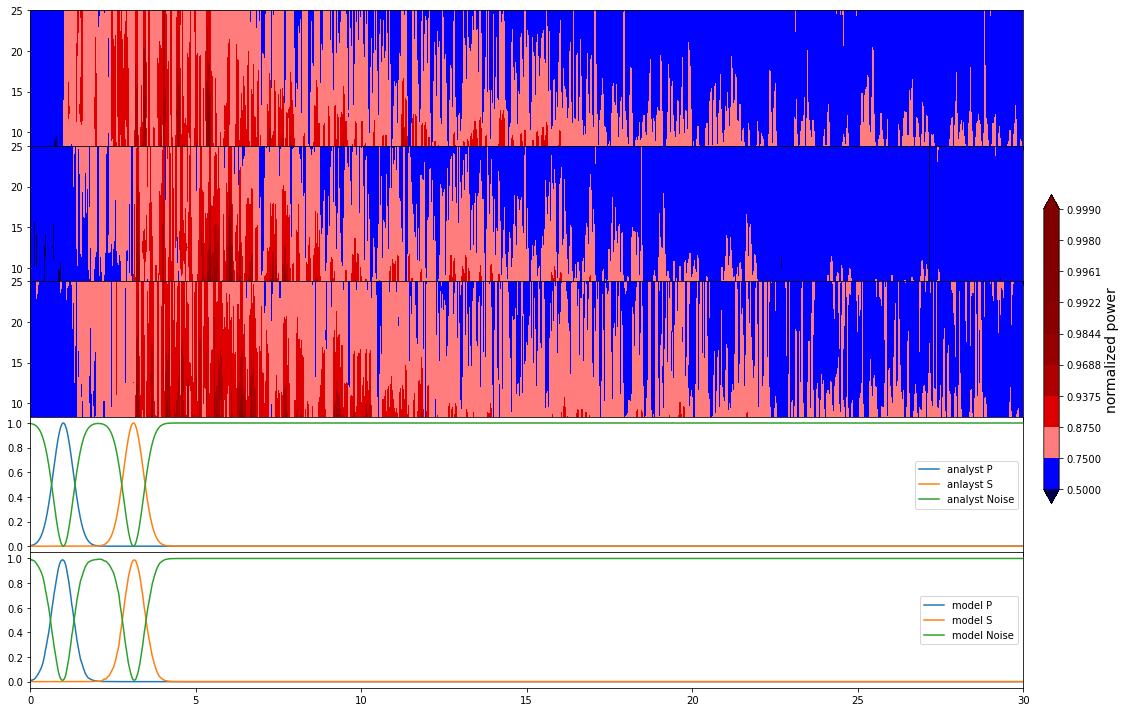

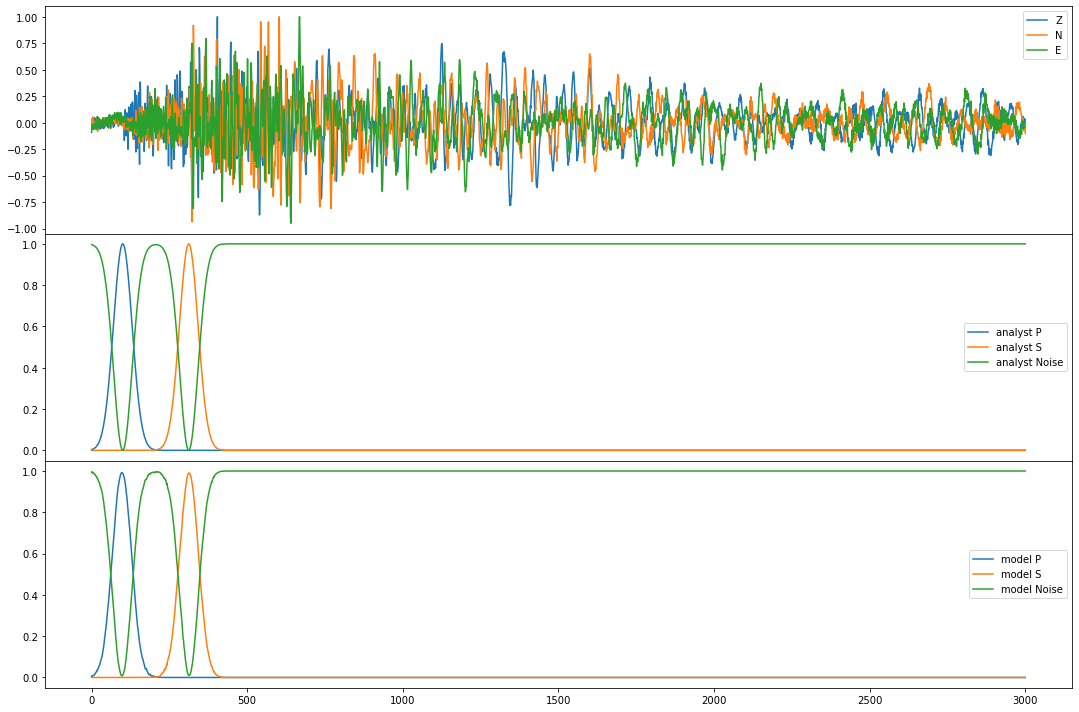

<Figure size 1152x720 with 0 Axes>

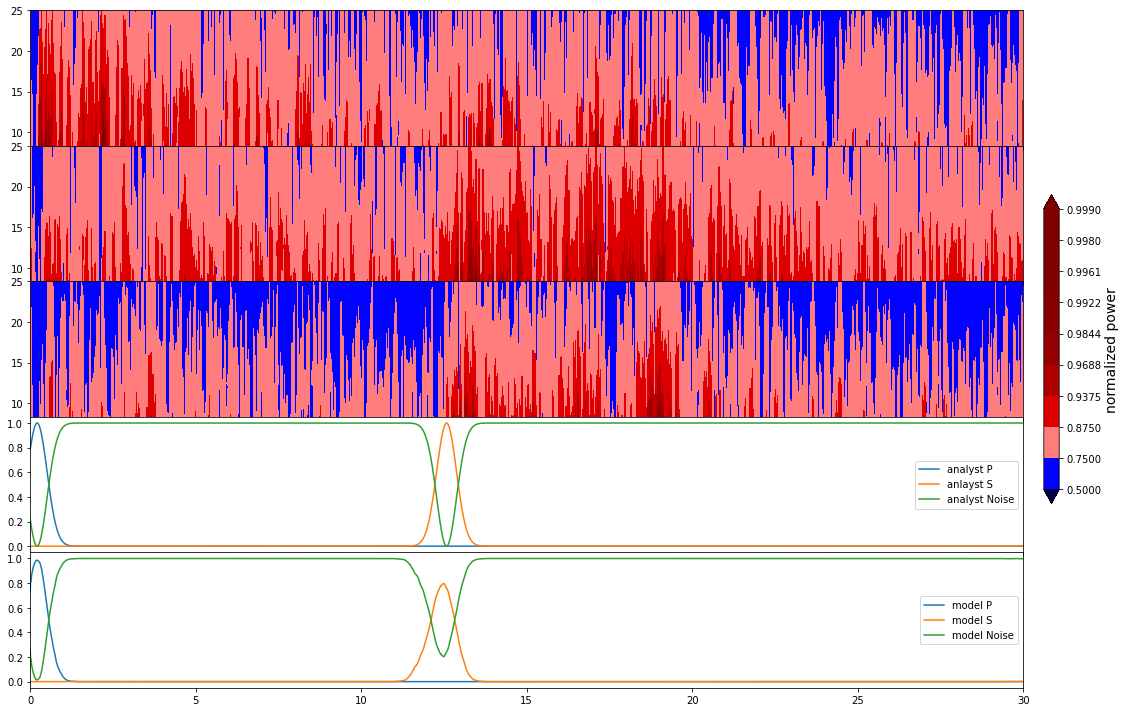

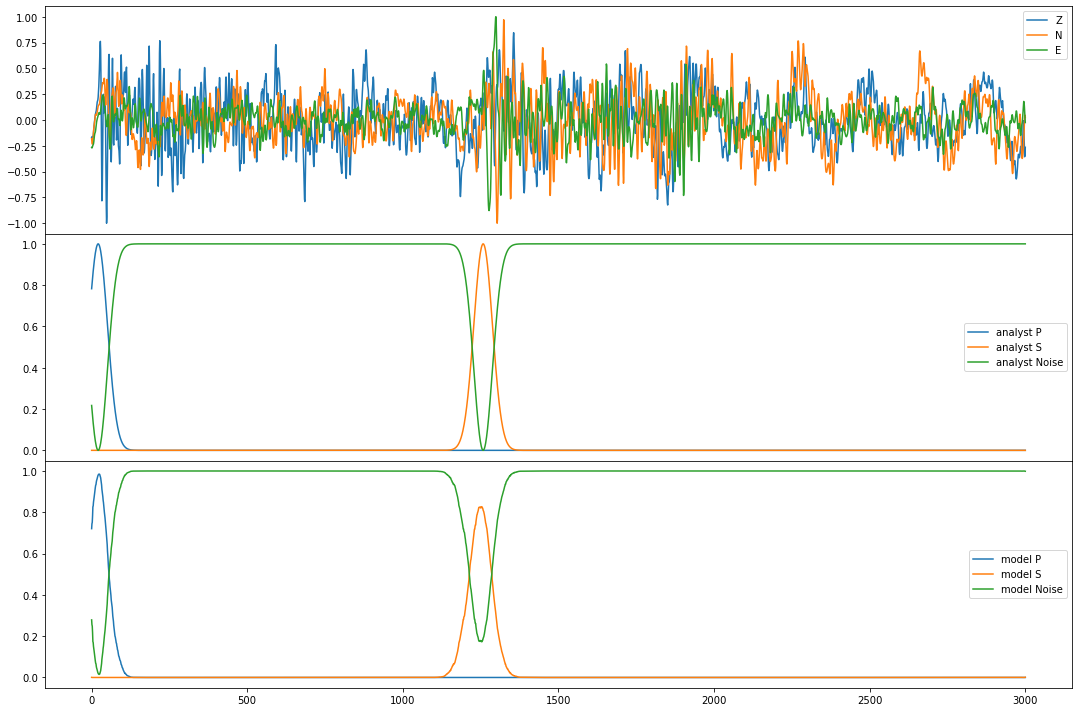

In [95]:


for i in range(10):
    idx = random.randrange(len(samples['wfs']))
    #print(idx)
    X = np.reshape(samples['wfs'][idx].T,(9,3001))
    Y = np.reshape(samples['truth'][idx].T,(3,3001))
    preds = np.reshape(samples['preds'][idx].T,(3,3001))
    plot_scaleo(X, Y, preds, freq)
    Y = np.reshape(wf_results['truth'][idx].T,(3,3001))
    X = np.reshape(wf_results['wfs'][idx].T,(3,3001))
    preds = np.reshape(wf_results['preds'][idx].T,(3,3001))
    plot_data(X,Y,preds)
    

In [81]:
with open('sub_wf_results.pickle', 'rb') as handle:
    wf_results = pickle.load(handle)


WAVEFORM:
.1s accuracy for  P-wave 0.89135
.5s accuracy for  P-wave 0.95372
.1s accuracy for  S-wave 0.78049
.5s accuracy for  S-wave 0.93496
SCALOGRAM:
.1s accuracy for  P-wave 0.88956
.5s accuracy for  P-wave 0.95582
.1s accuracy for  S-wave 0.77236
.5s accuracy for  S-wave 0.93699


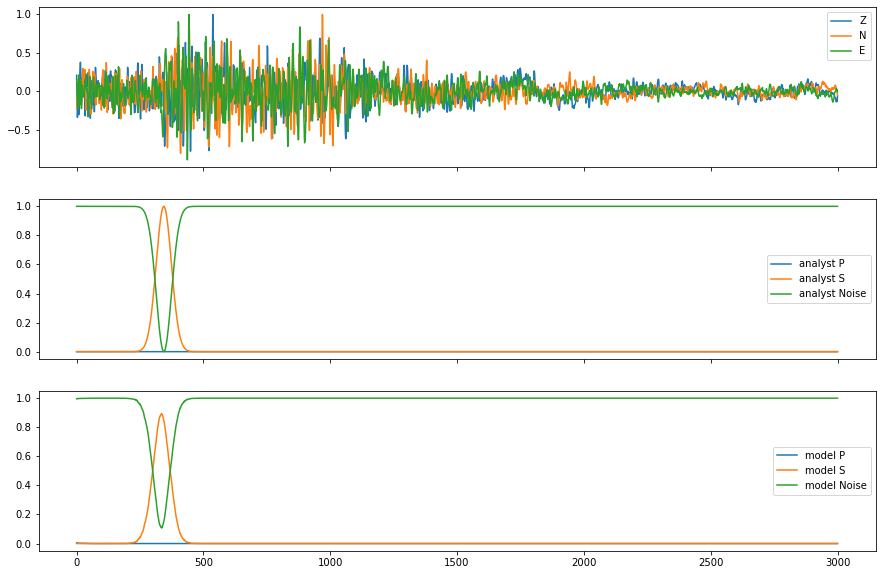

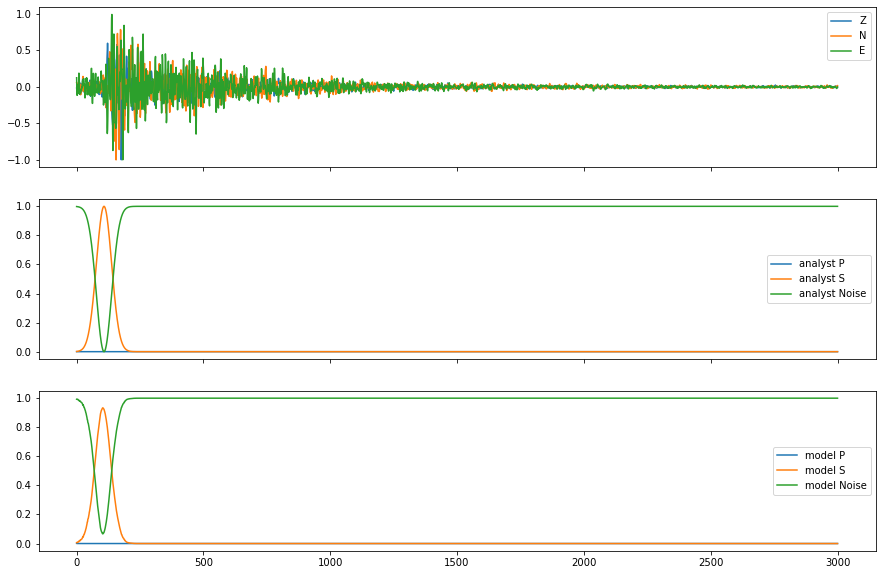

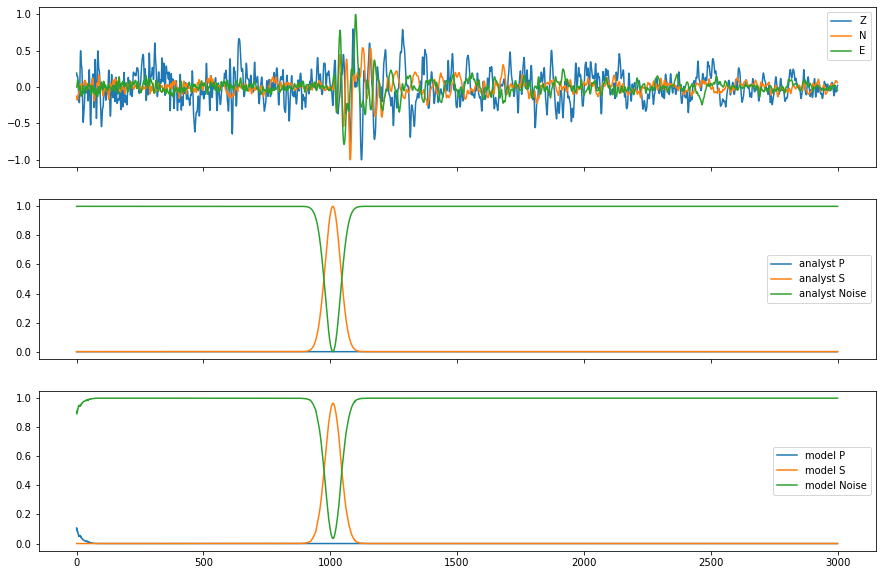

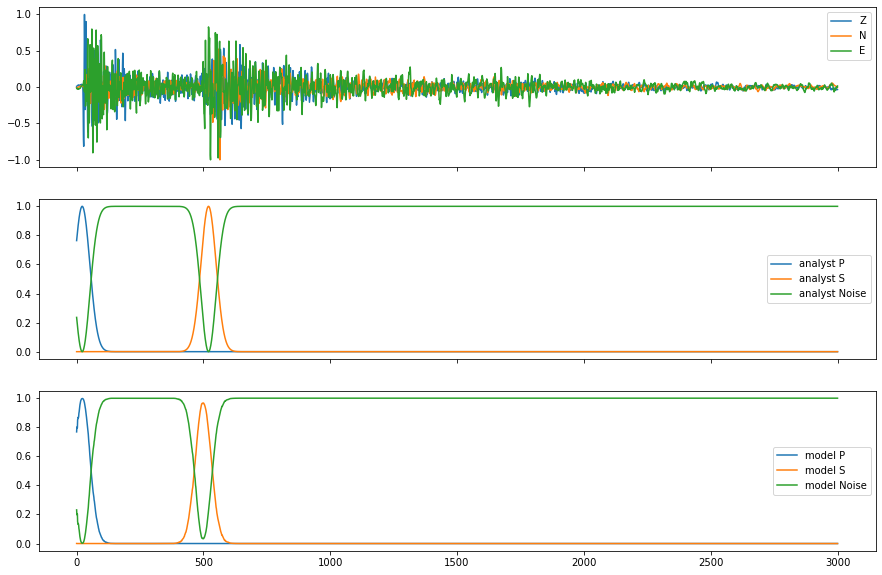

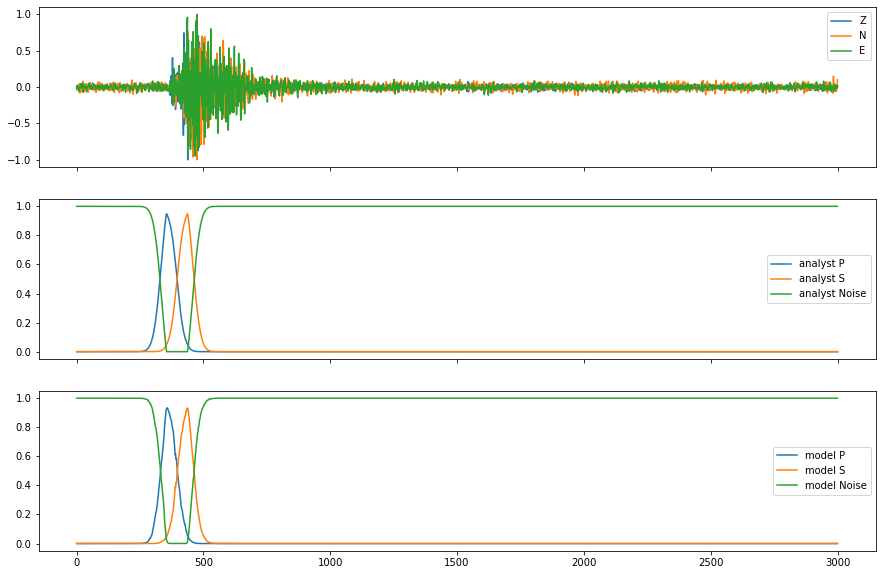

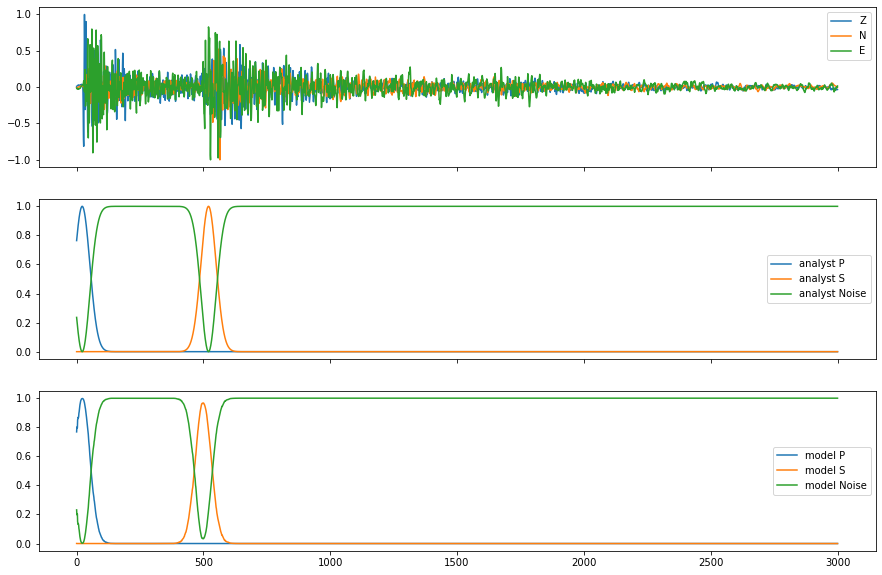

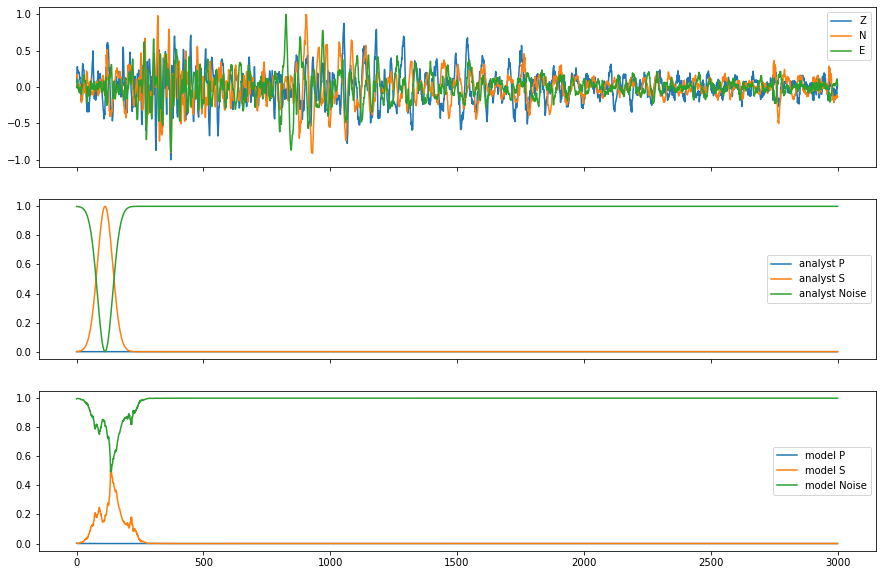

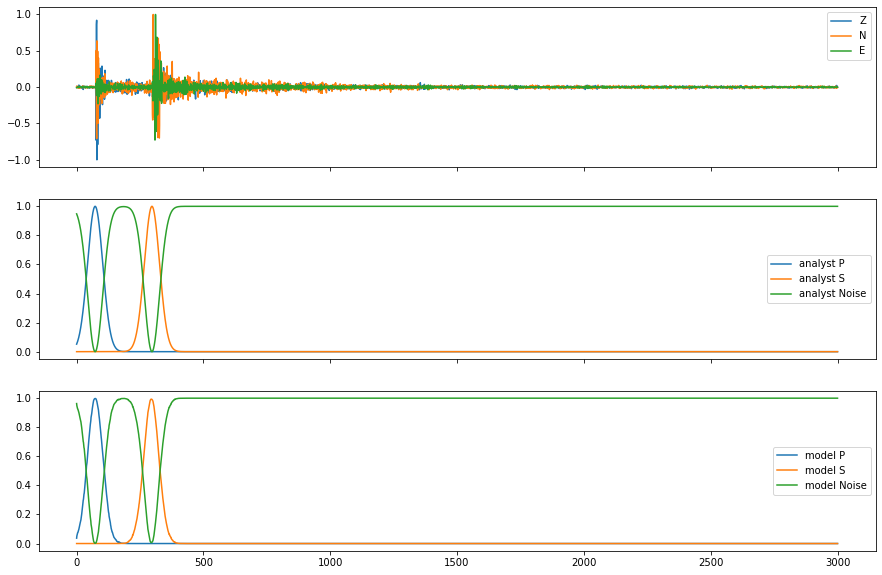

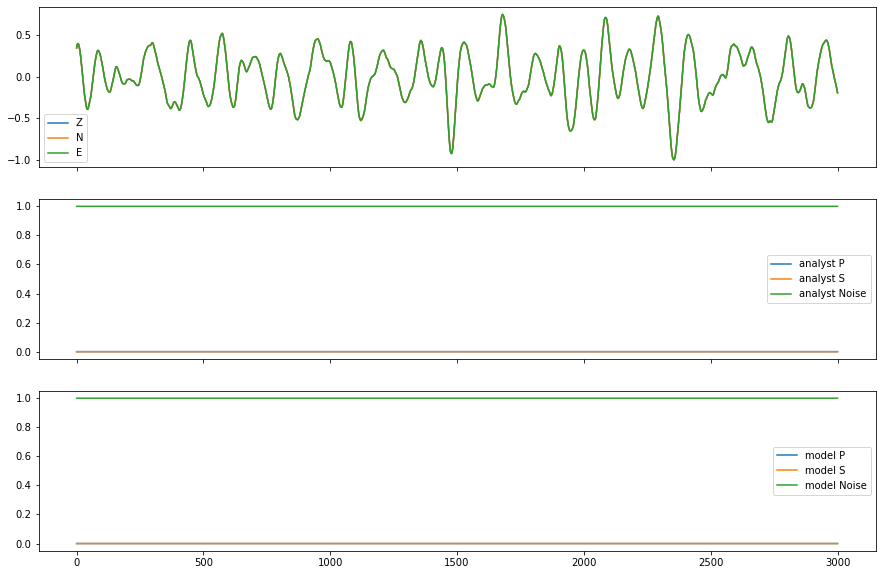

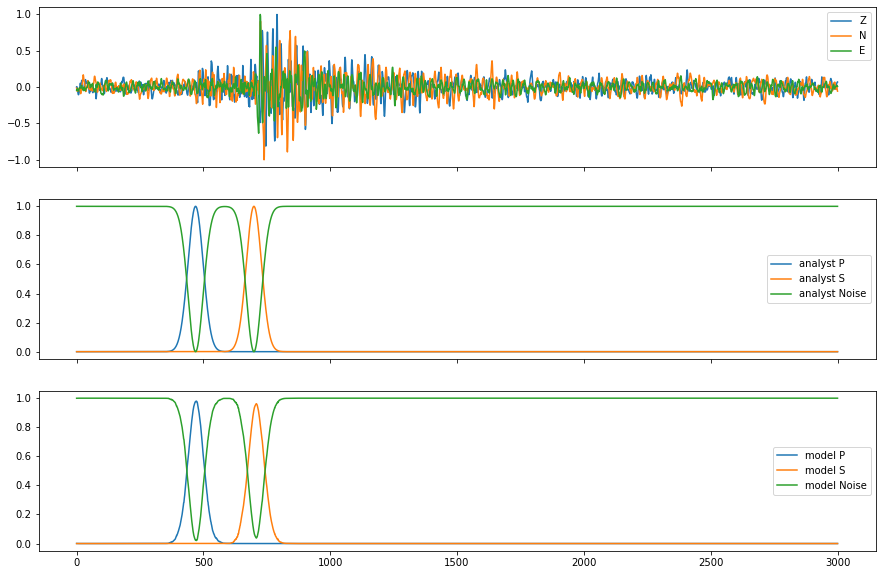

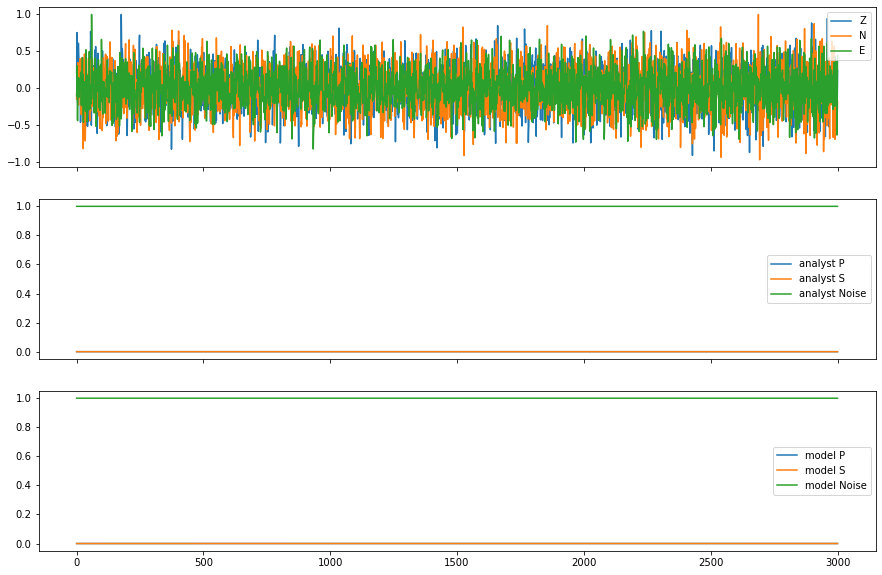

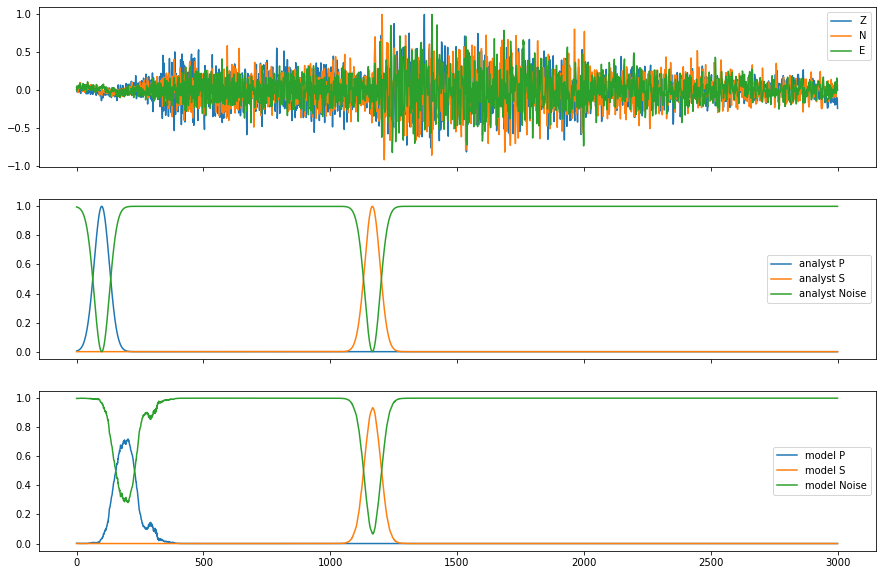

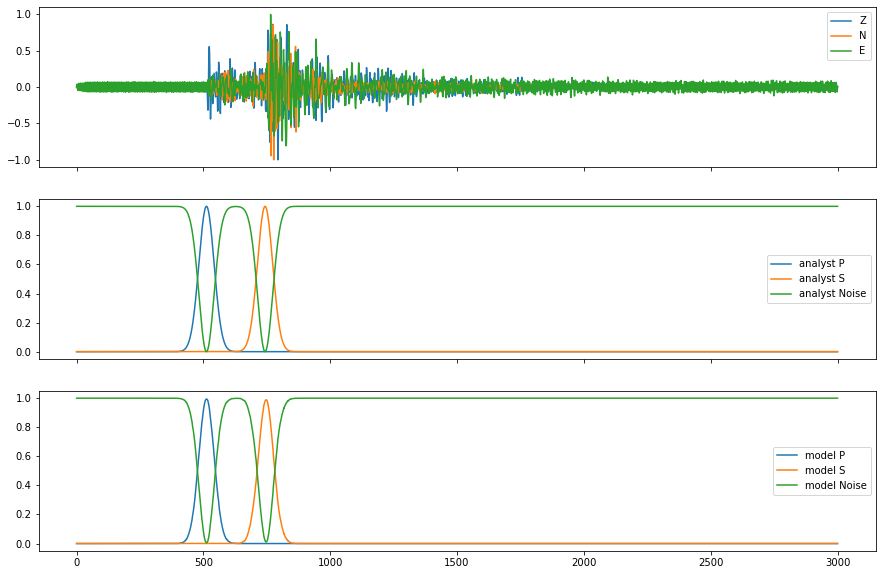

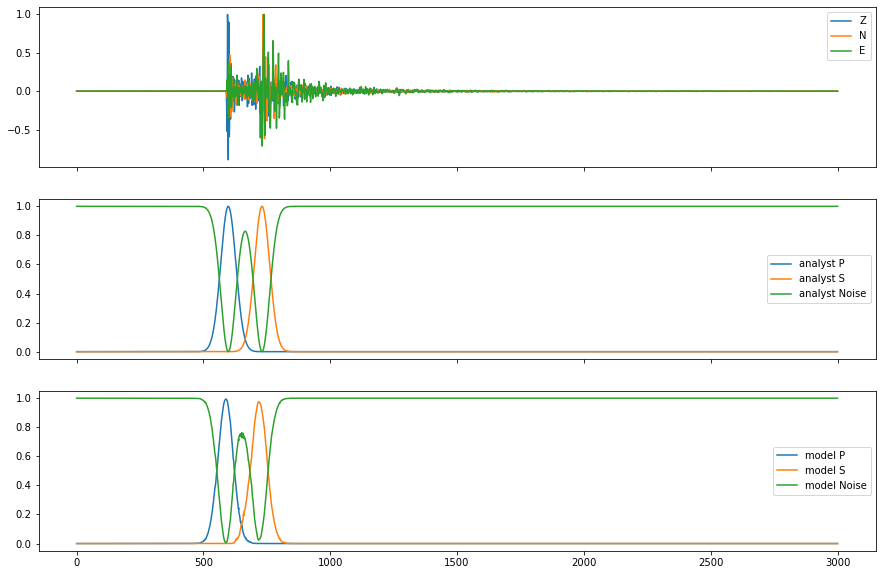

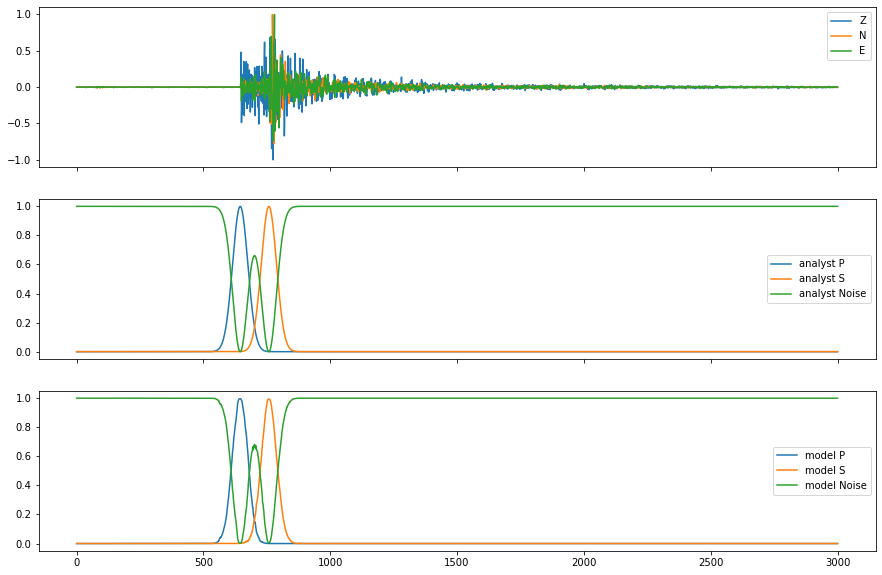

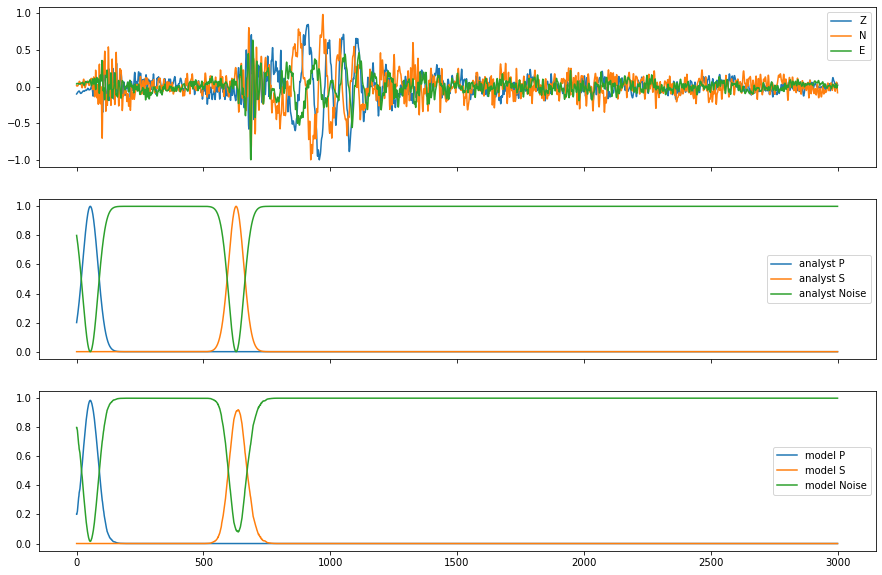

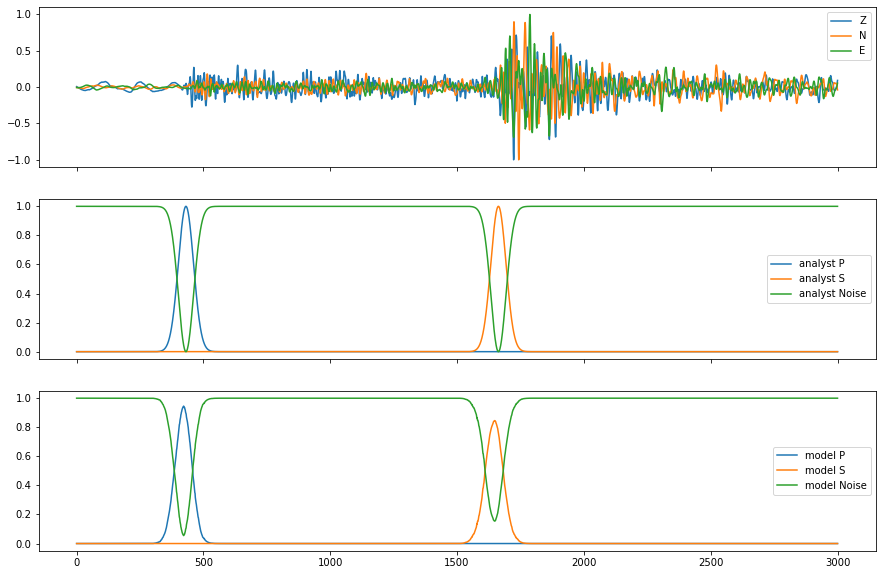

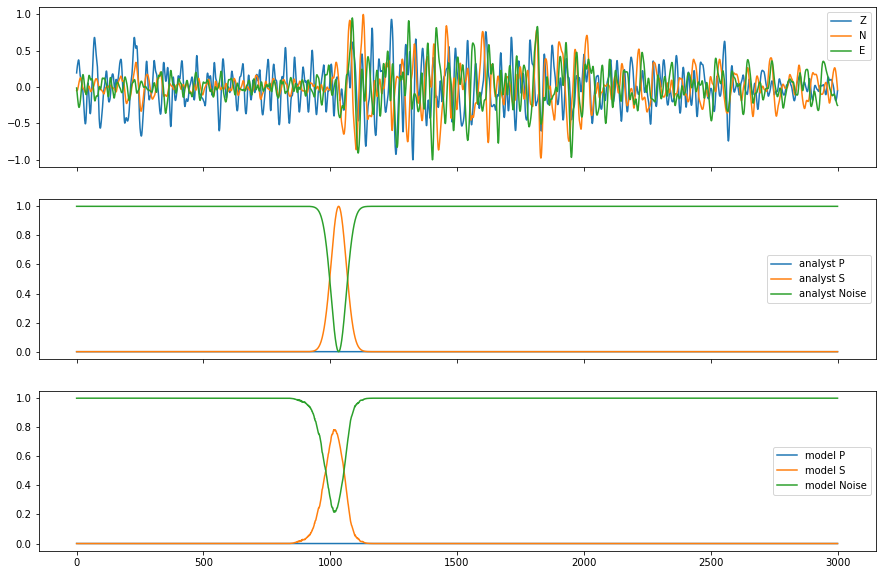

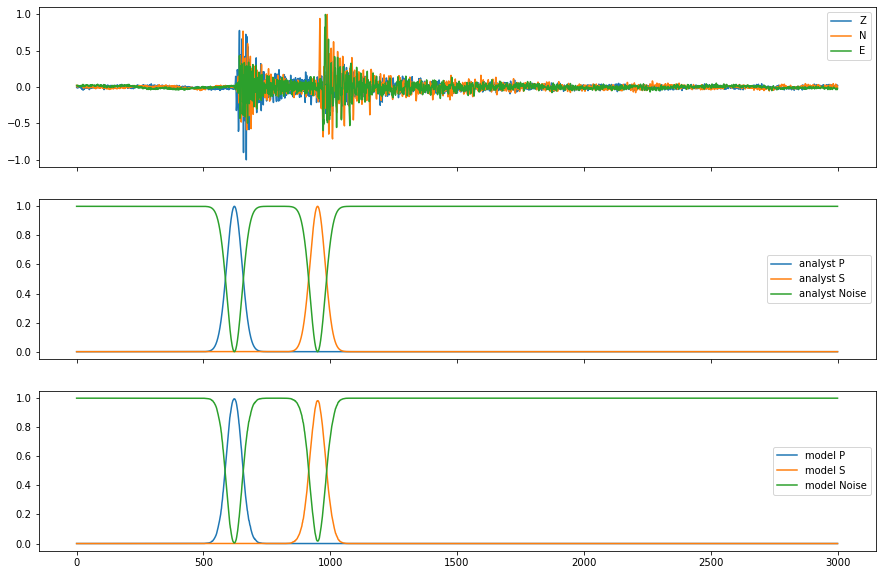

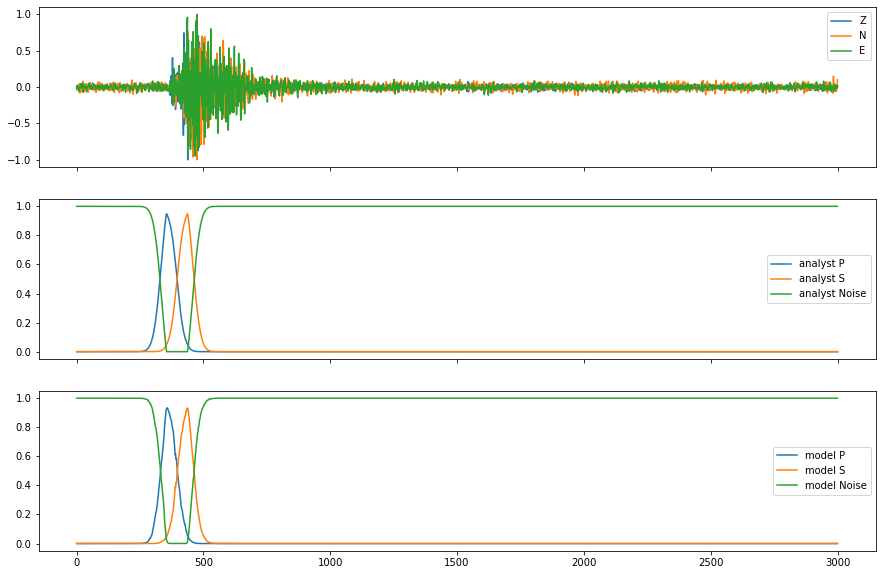

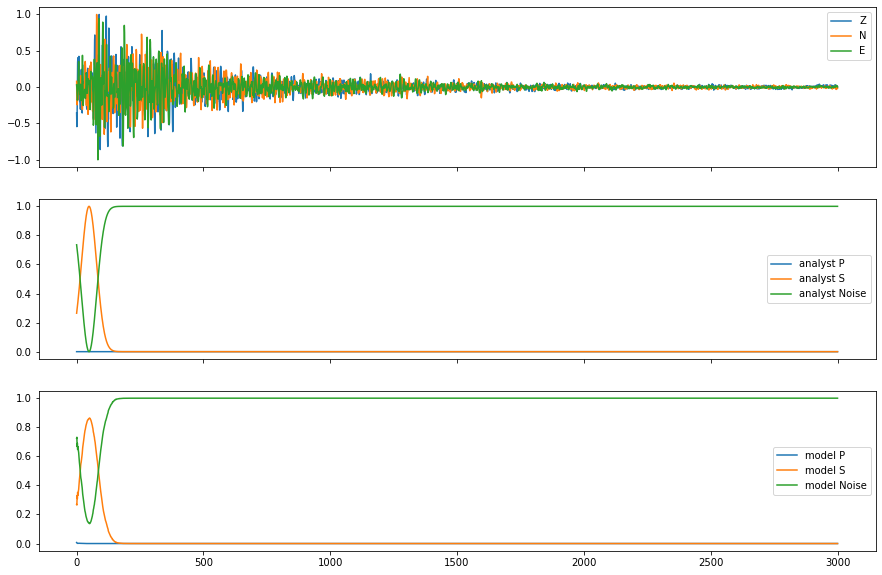

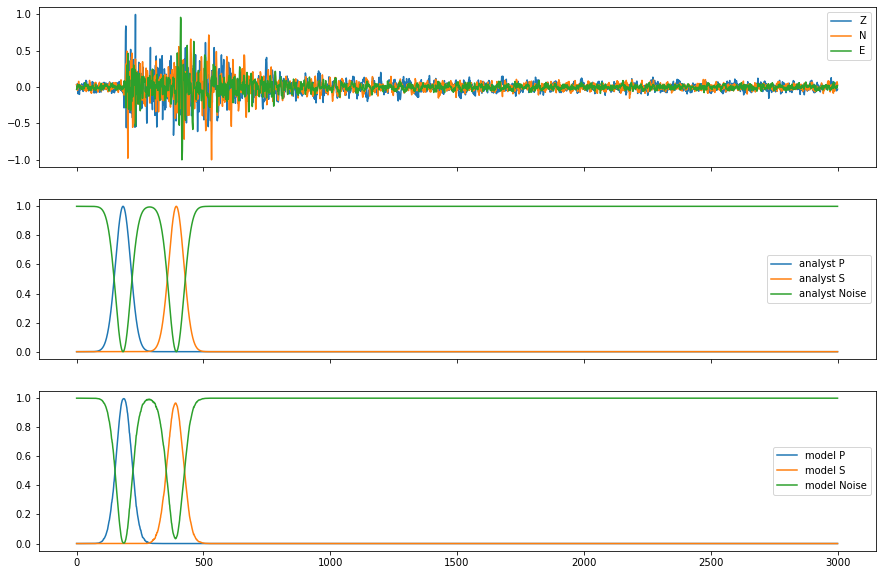

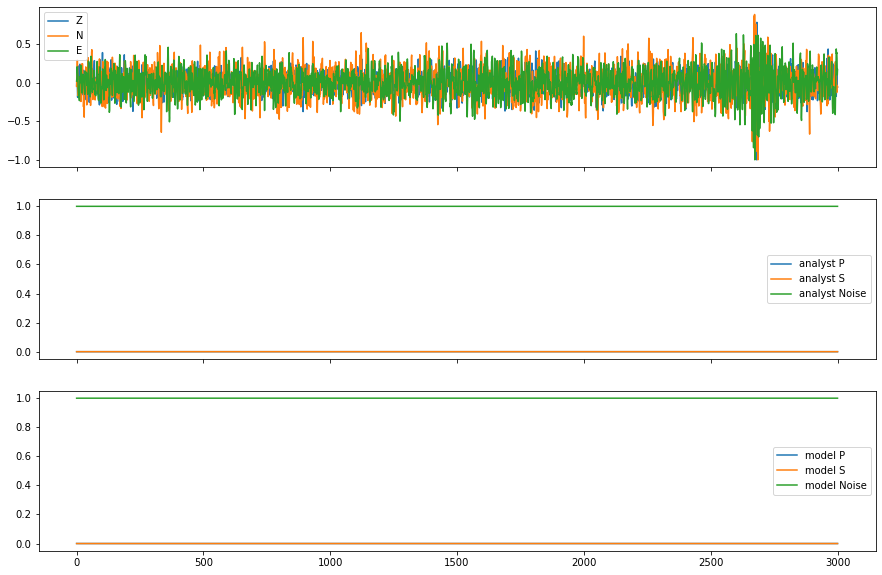

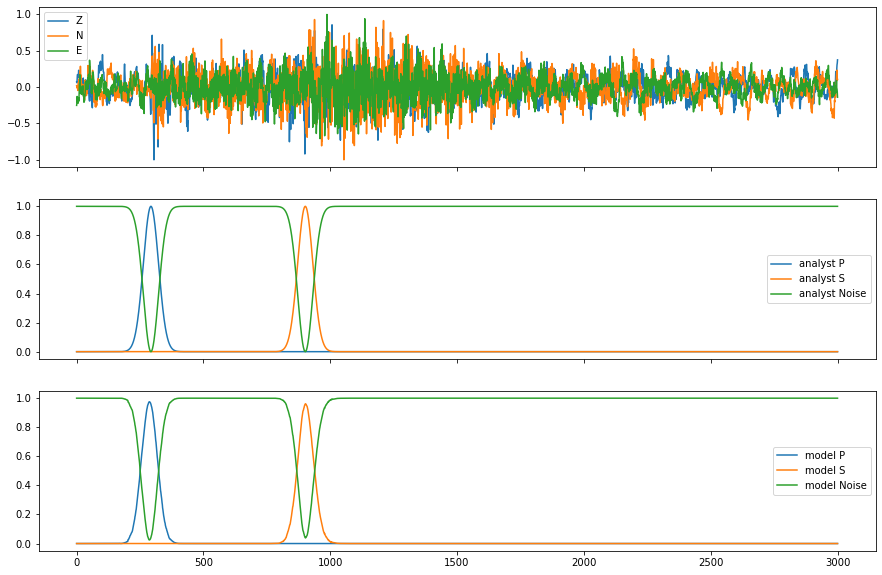

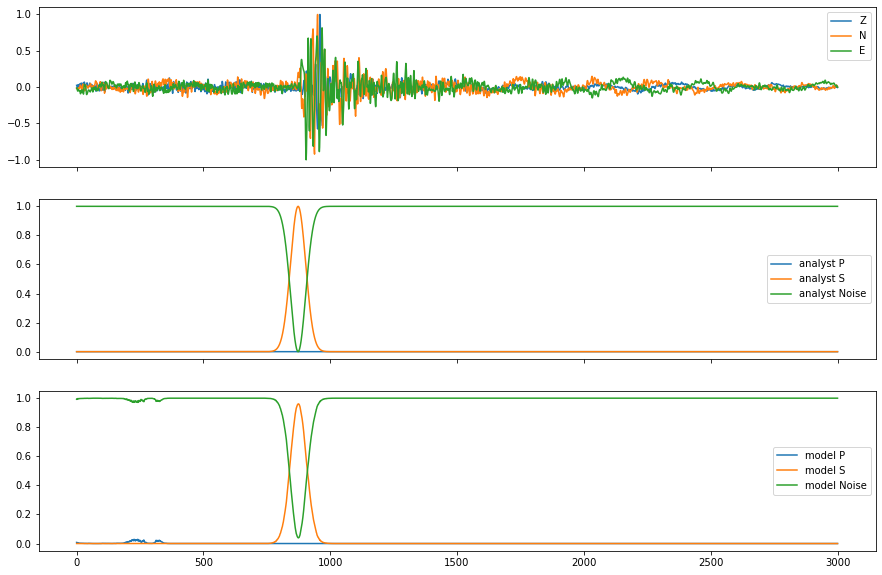

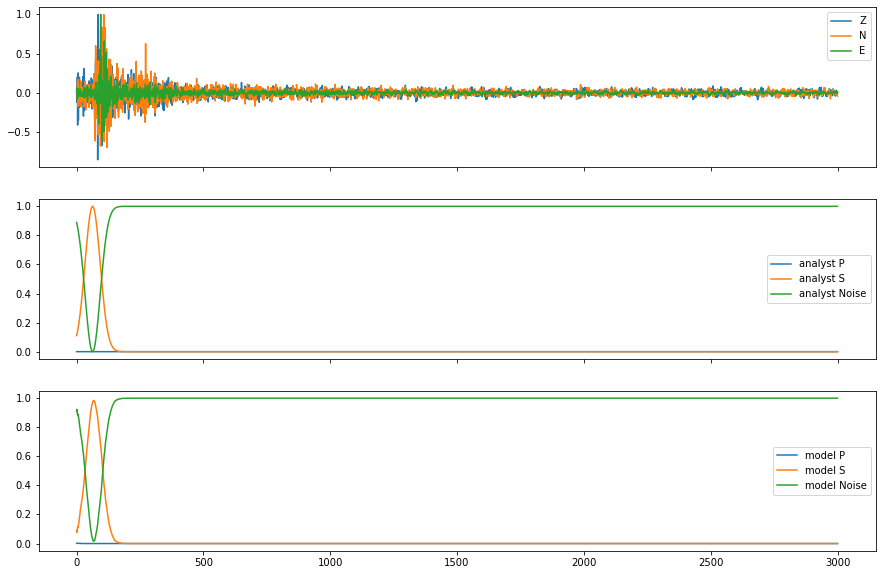

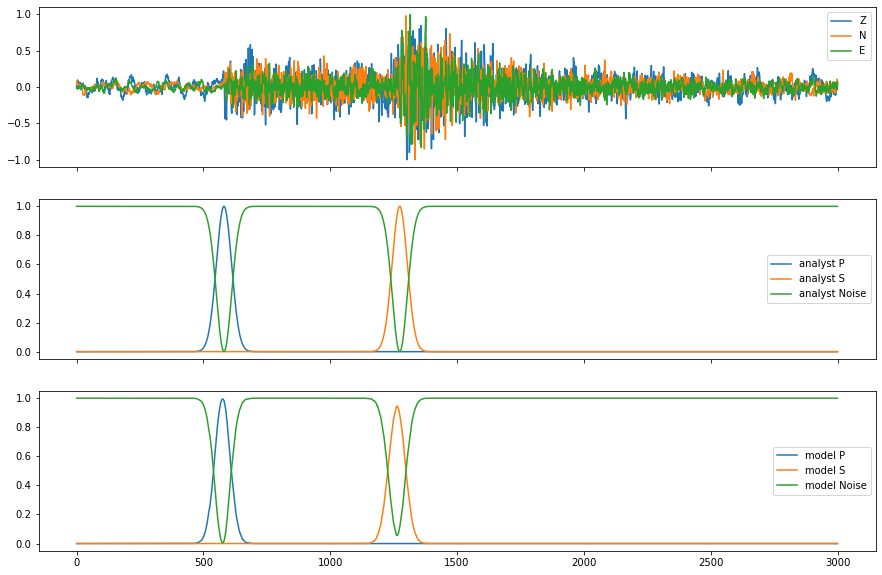

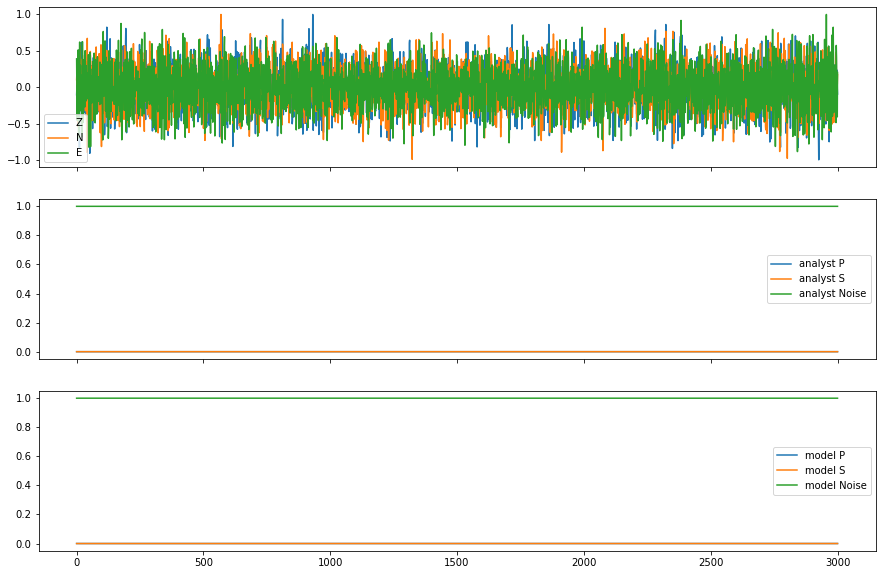

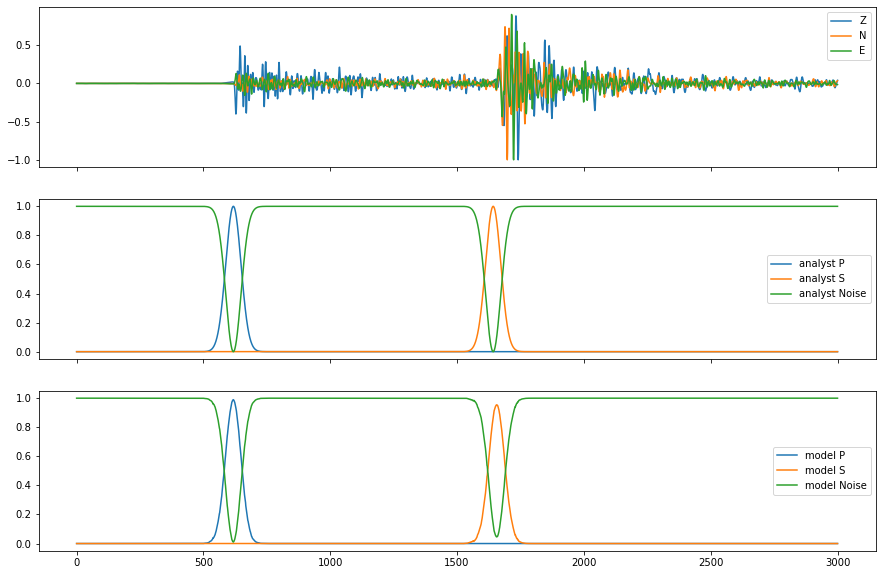

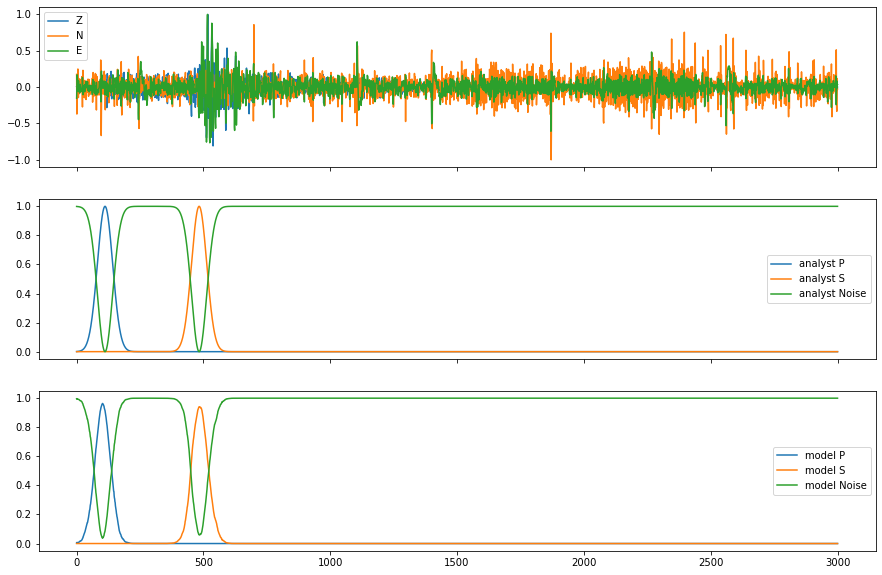

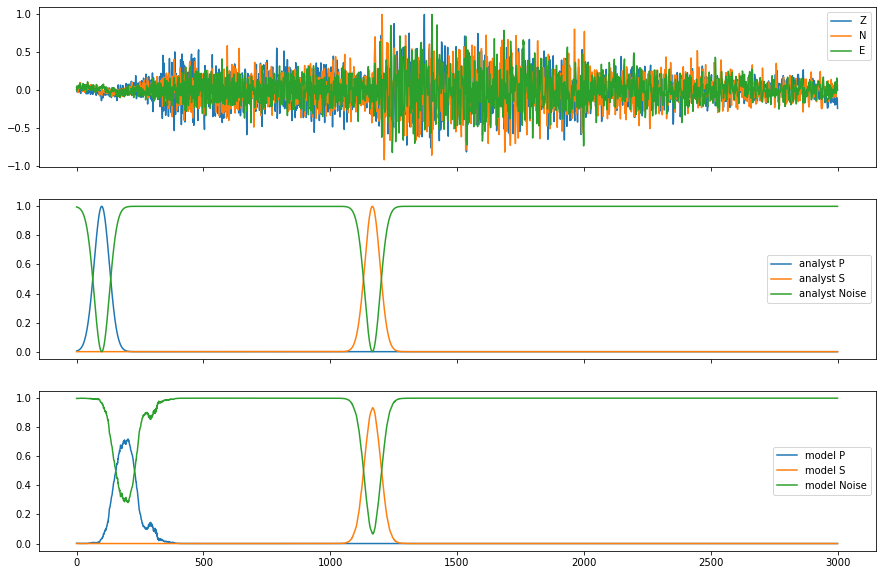

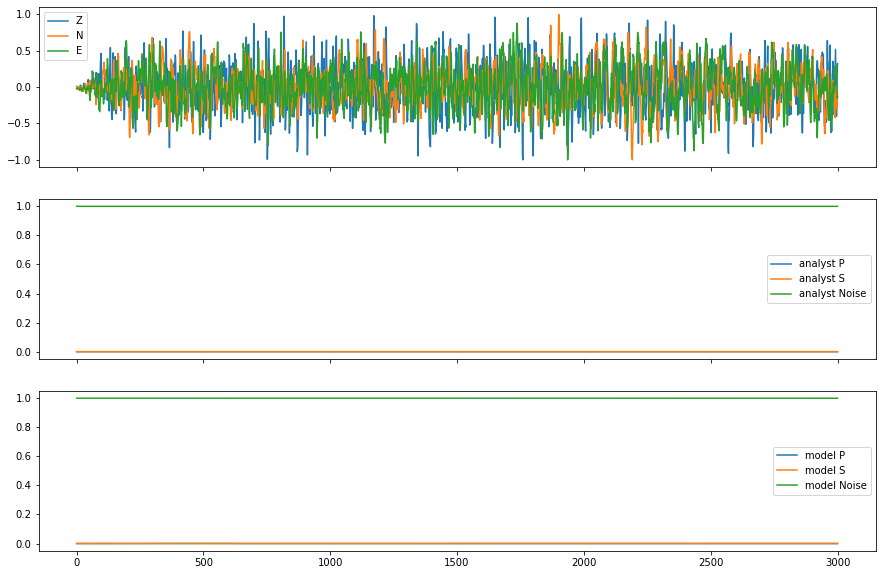

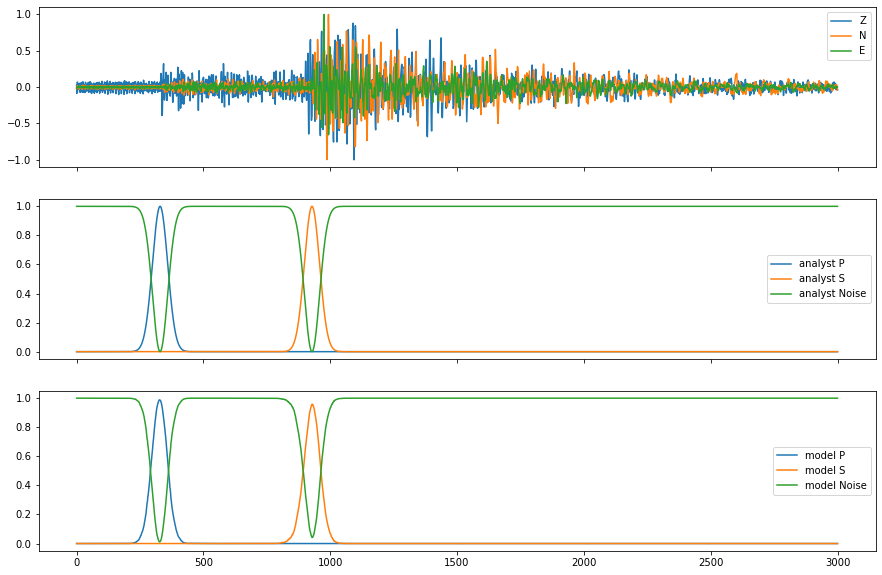

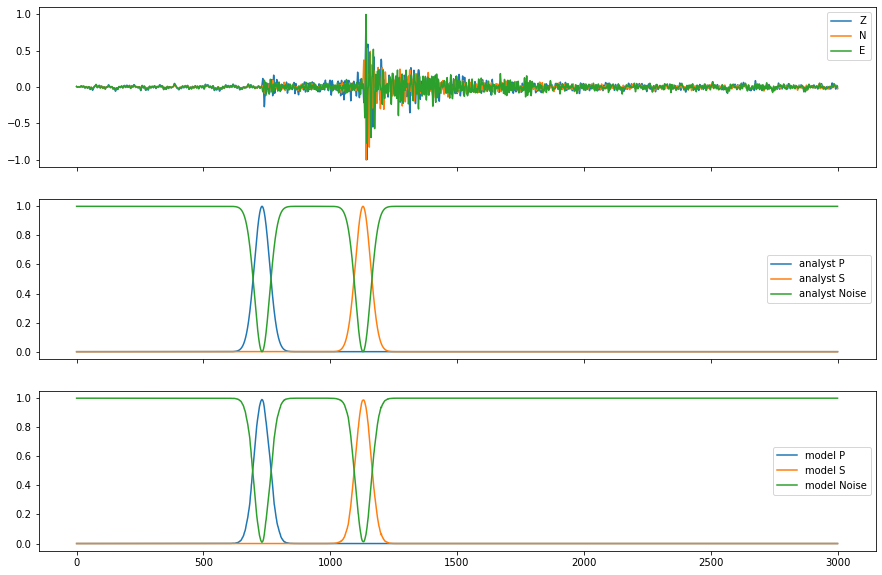

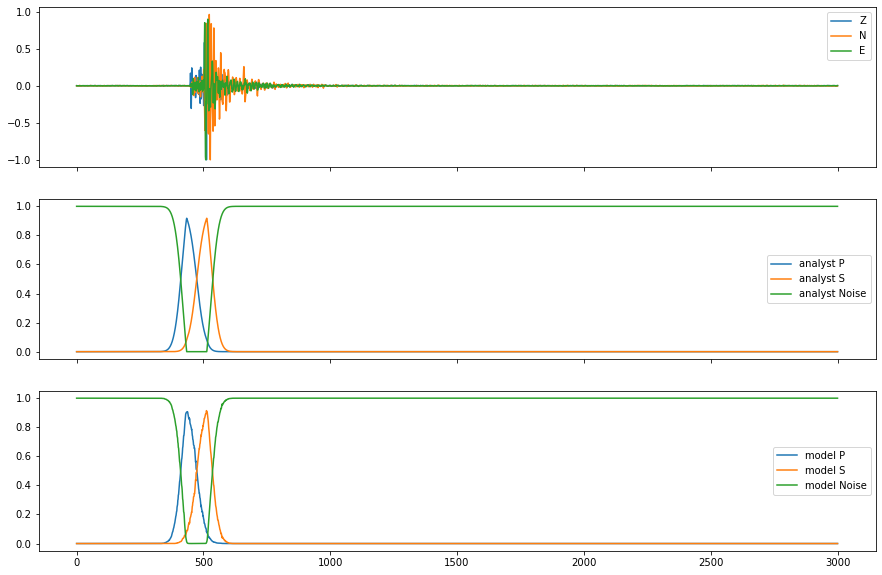

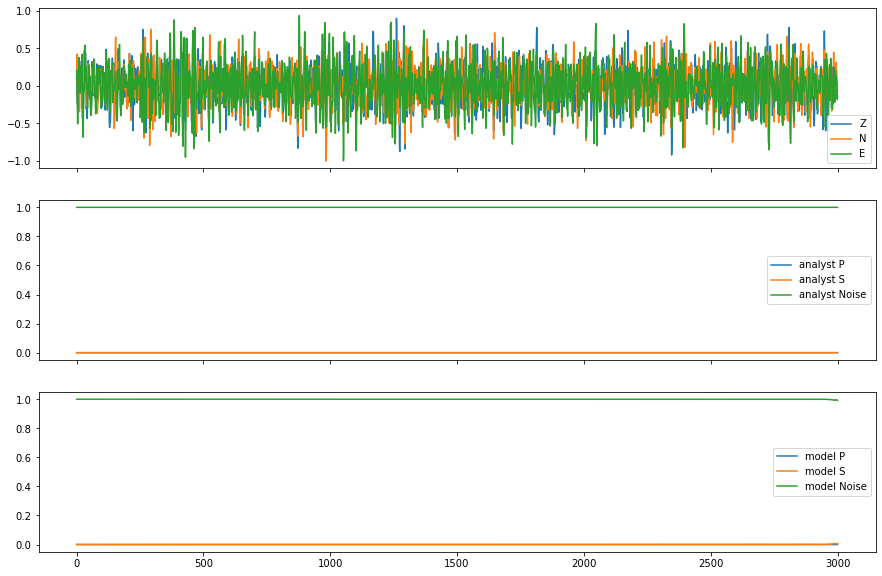

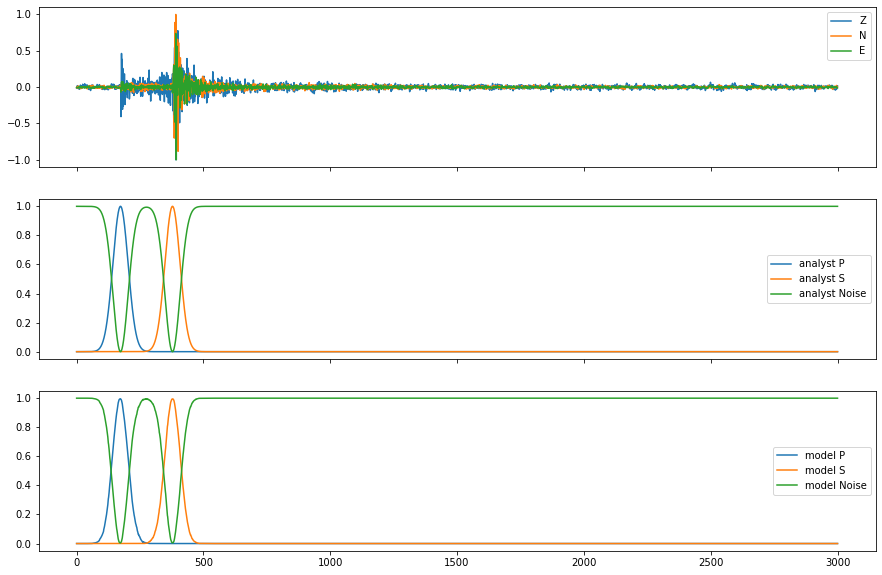

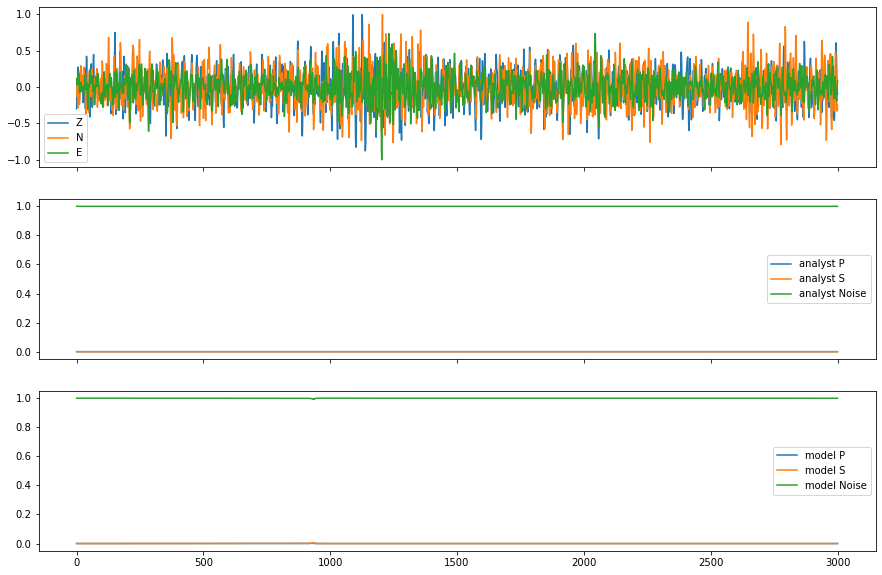

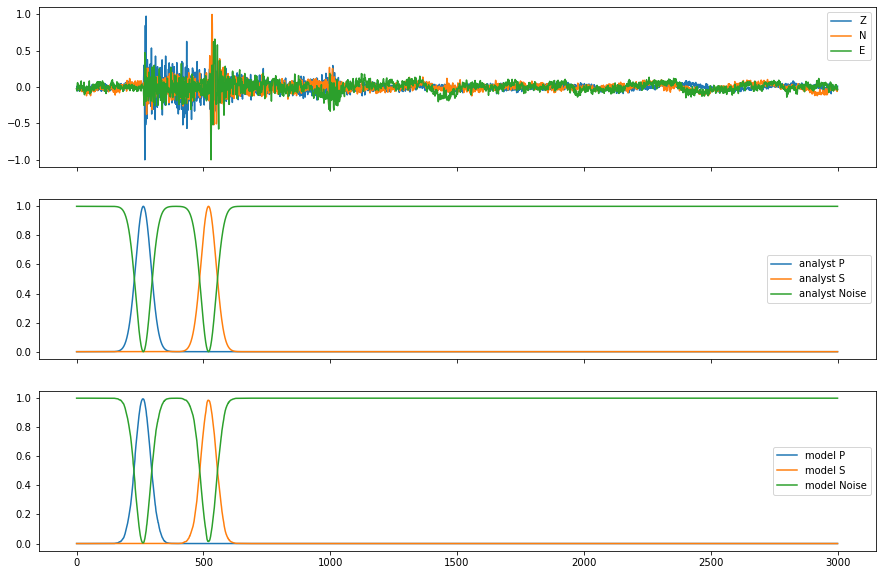

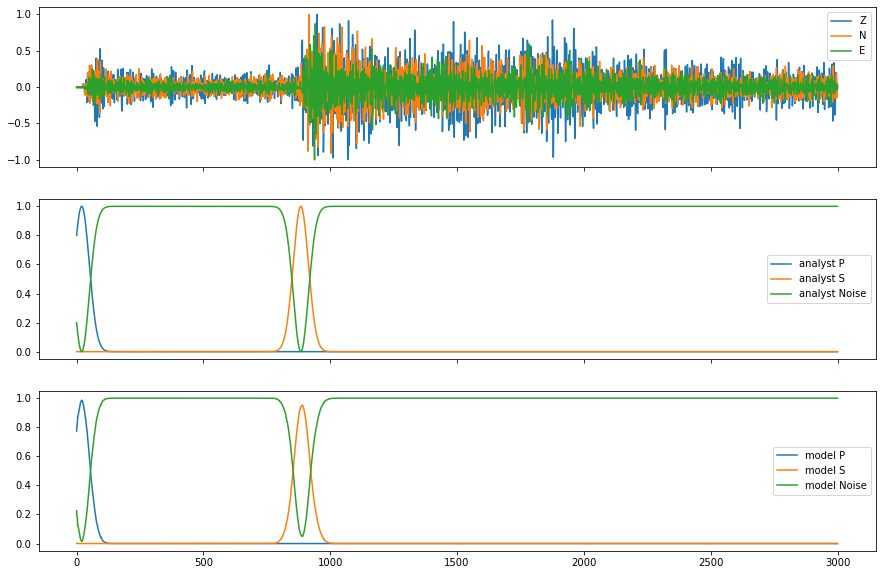

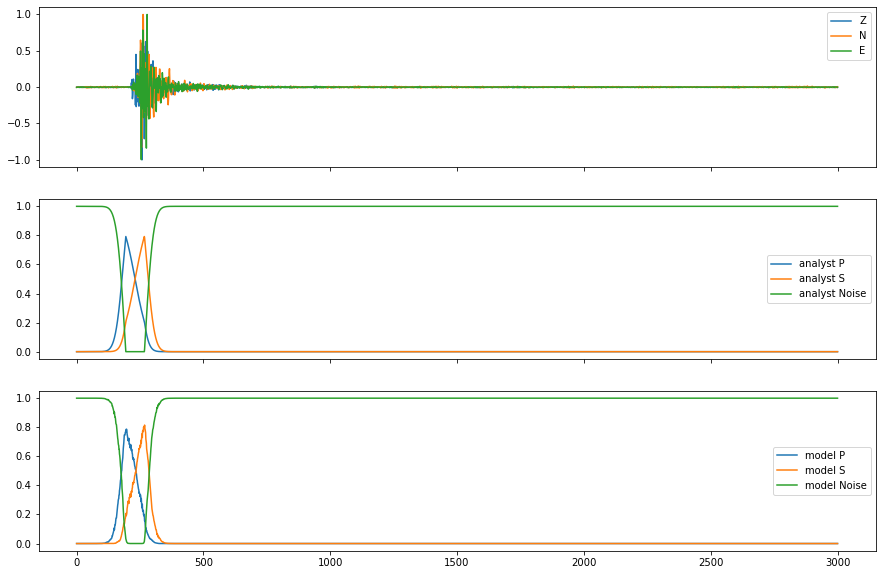

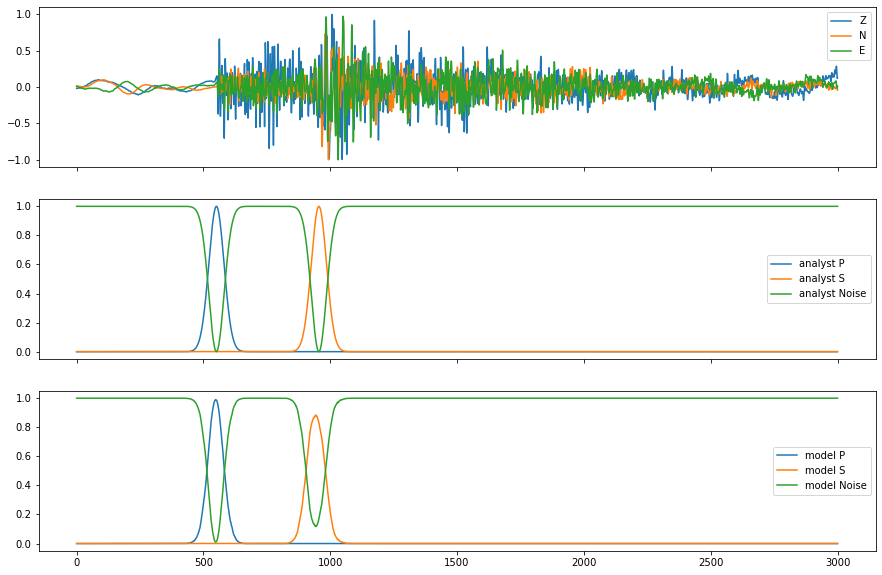

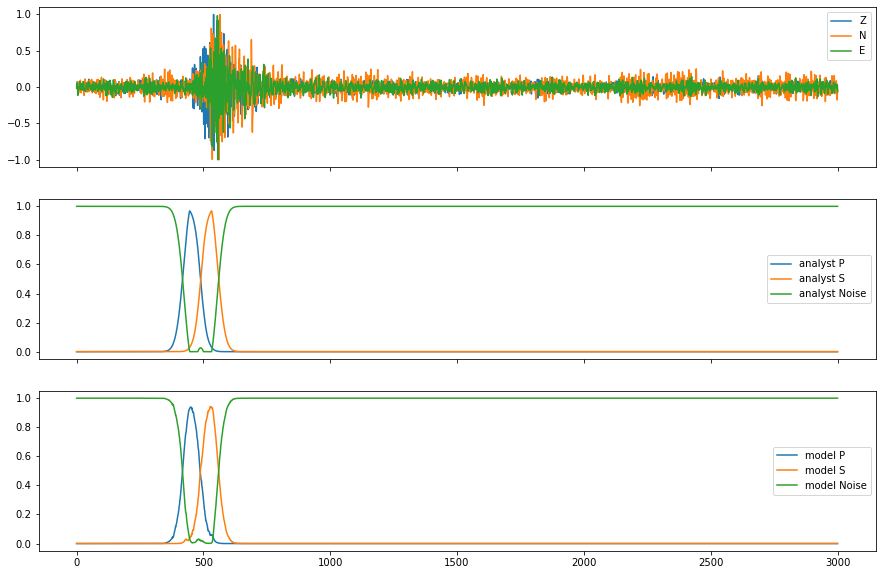

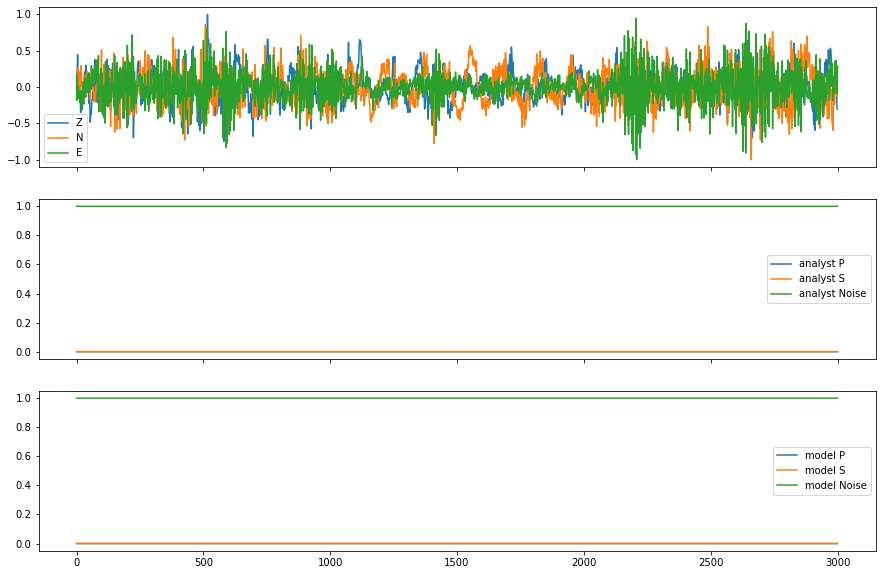

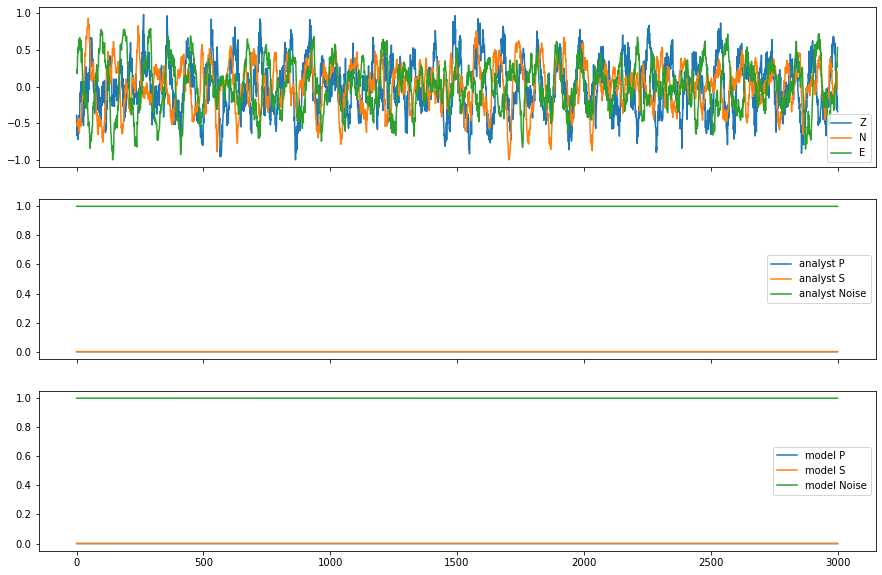

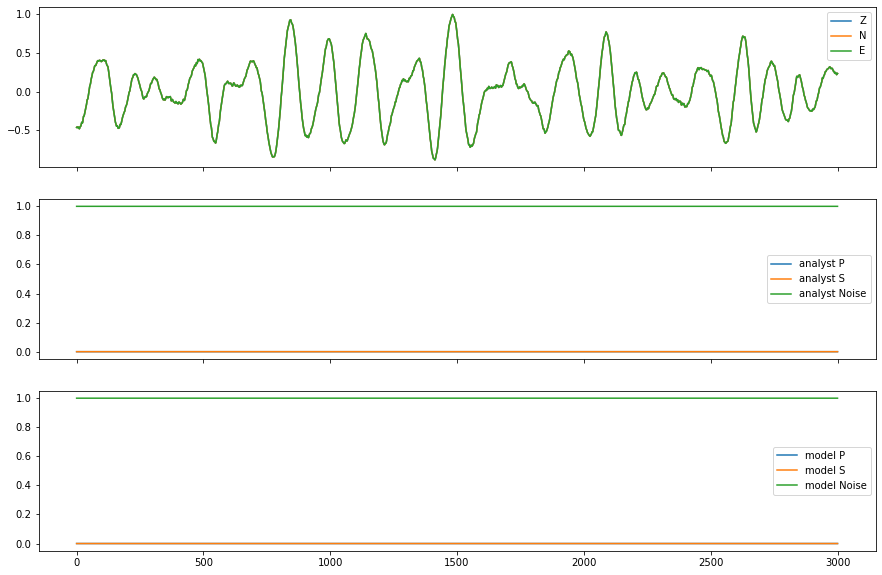

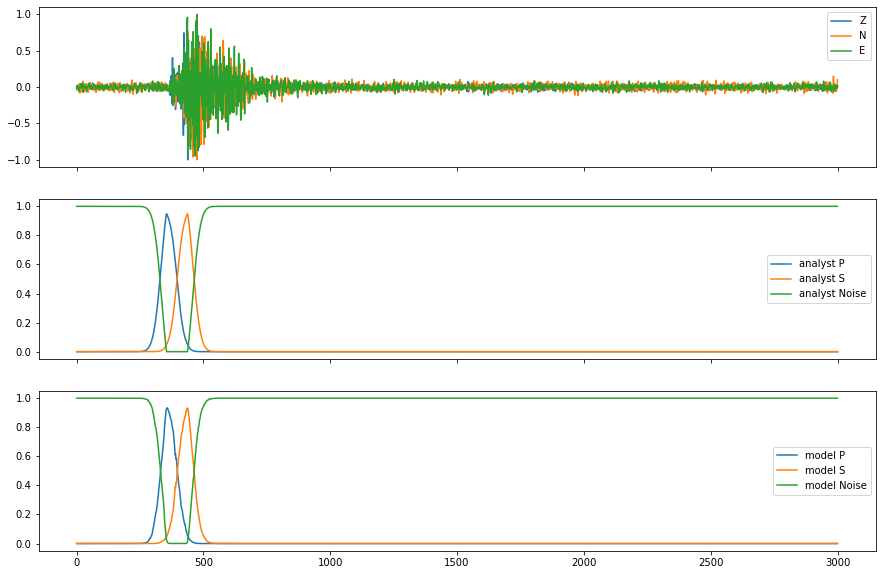

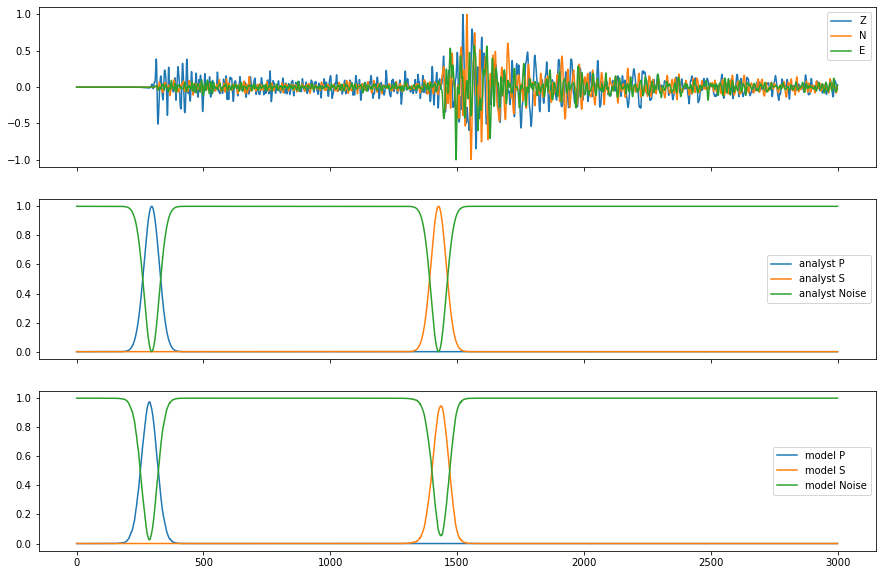

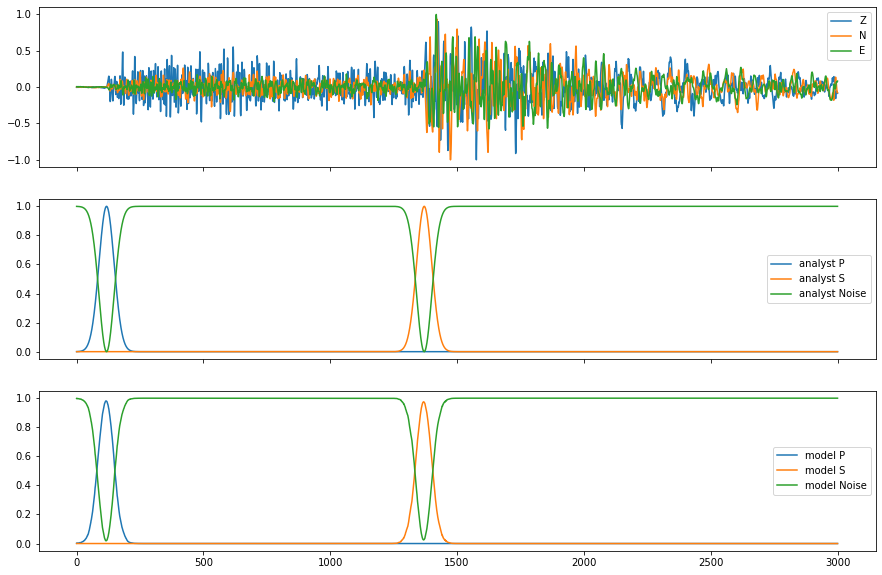

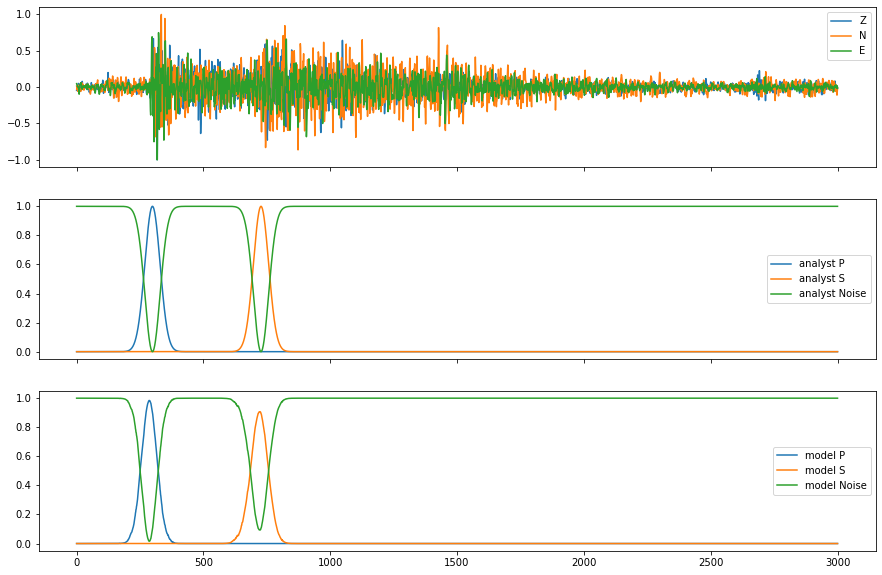

In [15]:


    
for i in range(50):
    idx = random.randrange(len(wf_results['wfs']))
    Y = np.reshape(wf_results['truth'][idx].T,(3,3001))
    X = np.reshape(wf_results['wfs'][idx].T,(3,3001))
    preds = np.reshape(wf_results['preds'][idx].T,(3,3001))
    plot_data(X,Y,preds)
    